# TR Data Challenge 2023 - Data Analysis

This notebook reads and analyzes the TRDataChallenge2023.txt file containing legal documents.

In [12]:
import json
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 100)

## 1. Load the Data

In [13]:
def load_tr_data(file_path='/mnt/d/TR-Project/TRDataChallenge2023.txt'):
    """
    Load TR data from the text file.
    """
    documents = []
    
    print(f"Loading data from: {file_path}")
    file_size_mb = os.path.getsize(file_path) / (1024*1024)
    print(f"File size: {file_size_mb:.2f} MB")
    
    with open(file_path, 'r', encoding='utf-8') as file:
        for i, line in enumerate(file):
            if line.strip():
                try:
                    doc = json.loads(line.strip())
                    documents.append(doc)
                    
                    if (i + 1) % 5000 == 0:
                        print(f"Loaded {i + 1} lines...")
                        
                except json.JSONDecodeError:
                    continue
    
    print(f"Total documents loaded: {len(documents)}")
    return documents

# Load the data
documents = load_tr_data()

Loading data from: /mnt/d/TR-Project/TRDataChallenge2023.txt
File size: 321.03 MB
Loaded 5000 lines...
Loaded 10000 lines...
Loaded 15000 lines...
Total documents loaded: 18000


## 2. Explore Raw Data Structure

In [14]:
# Examine the structure of the first document
if documents:
    print("Keys in first document:")
    print(list(documents[0].keys()))
    
    print("\nFirst document:")
    print(json.dumps(documents[0], indent=2)[:1000] + "...")  # Show first 1000 chars

Keys in first document:
['documentId', 'postures', 'sections']

First document:
{
  "documentId": "Ib4e590e0a55f11e8a5d58a2c8dcb28b5",
  "postures": [
    "On Appeal"
  ],
  "sections": [
    {
      "headtext": "",
      "paragraphs": [
        "Plaintiff Dwight Watson (\u201cHusband\u201d) appeals from the trial court\u2019s equitable distribution order entered 28 February 2017. On appeal, plaintiff contends that the trial court erred in its classification, valuation, and distribution of the parties\u2019 property and in granting defendant Gertha\u2009 Watson (\u201cWife\u201d) an unequal distribution of martial property. Because the trial court\u2019s findings of fact do not support its conclusions of law and because the distributional factors found by the trial court are based upon some of those erroneous findings and conclusions, we reverse the equitable distribution order and remand for entry of a new equitable distribution order."
      ]
    },
    {
      "headtext": "Backgrou

## 3. Convert to DataFrame

In [15]:
def create_dataframe(documents):
    """
    Convert documents to a pandas DataFrame.
    """
    data = []
    
    for doc in documents:
        # Basic document info
        row = {
            'document_id': doc.get('documentId', ''),
            'postures': ', '.join(doc.get('postures', [])),
            'num_postures': len(doc.get('postures', [])),
            'num_sections': len(doc.get('sections', [])),
        }
        
        # Extract text content
        all_text = []
        section_headers = []
        
        for section in doc.get('sections', []):
            header = section.get('headtext', '')
            if header:
                section_headers.append(header)
            
            paragraphs = section.get('paragraphs', [])
            all_text.extend(paragraphs)
        
        row['section_headers'] = ' | '.join(section_headers)
        row['full_text'] = ' '.join(all_text)
        row['text_length'] = len(row['full_text'])
        row['word_count'] = len(row['full_text'].split())
        row['num_paragraphs'] = len(all_text)
        row['num_headers'] = len(section_headers)
        
        data.append(row)
    
    return pd.DataFrame(data)

# Create DataFrame
df = create_dataframe(documents)
print(f"DataFrame shape: {df.shape}")
df.head()

DataFrame shape: (18000, 10)


,document_id,postures,num_postures,num_sections,section_headers,full_text,text_length,word_count,num_paragraphs,num_headers
0,Ib4e590e0a55f11e8a5d58a2c8dcb28b5,On Appeal,1,8,Background | Analysis | I. Classification issues | A. Cadillac El Dorado | B. Valuation of home ...,Plaintiff Dwight Watson (“Husband”) appeals from the trial court’s equitable distribution order ...,25583,4224,44,7
1,Ib06ab4d056a011e98c7a8e995225dbf9,"Appellate Review, Sentencing or Penalty Phase Motion or Objection",2,10,A. Offense Conduct | B. Prior Convictions | C. Guilty Plea | D. Sentencing | II. DISCUSSION | A....,"After pleading guilty, William Jerome Howard, Jr., appeals his 168-month sentence for possession...",18846,3004,29,9
2,Iaa3e3390b93111e9ba33b03ae9101fb2,"Motion to Compel Arbitration, On Appeal",2,8,I. Background | II. Analysis | A. Standard of Review | B. Greene's Derivative Claims on Behalf ...,"Frederick Greene, the plaintiff below, derivatively on behalf of both Oak and Cane Co. (“Oak”) a...",7387,1154,13,7
3,I0d4dffc381b711e280719c3f0e80bdd0,"On Appeal, Review of Administrative Decision",2,1,,"Appeal from an amended judgment of the Supreme Court (O'Connor, J.), entered September 20, 2011 ...",4300,659,6,0
4,I82c7ef10d6d111e8aec5b23c3317c9c0,On Appeal,1,1,,"Order, Supreme Court, New York County (Arthur F. Engeron, J.), entered July 25, 2017, which gran...",2628,420,5,0


## 4. Data Analysis and Visualization

In [7]:
# Basic statistics
print("Dataset Overview:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   document_id      18000 non-null  object
 1   postures         18000 non-null  object
 2   num_postures     18000 non-null  int64 
 3   num_sections     18000 non-null  int64 
 4   section_headers  18000 non-null  object
 5   full_text        18000 non-null  object
 6   text_length      18000 non-null  int64 
 7   word_count       18000 non-null  int64 
 8   num_paragraphs   18000 non-null  int64 
 9   num_headers      18000 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 1.4+ MB
None

Descriptive Statistics:
       num_postures  num_sections    text_length     word_count  \
count  18000.000000  18000.000000   18000.000000   18000.000000   
mean       1.536611      5.086889   17986.551944    2891.668778   
std        0.752936      5.730469   19491.445944    

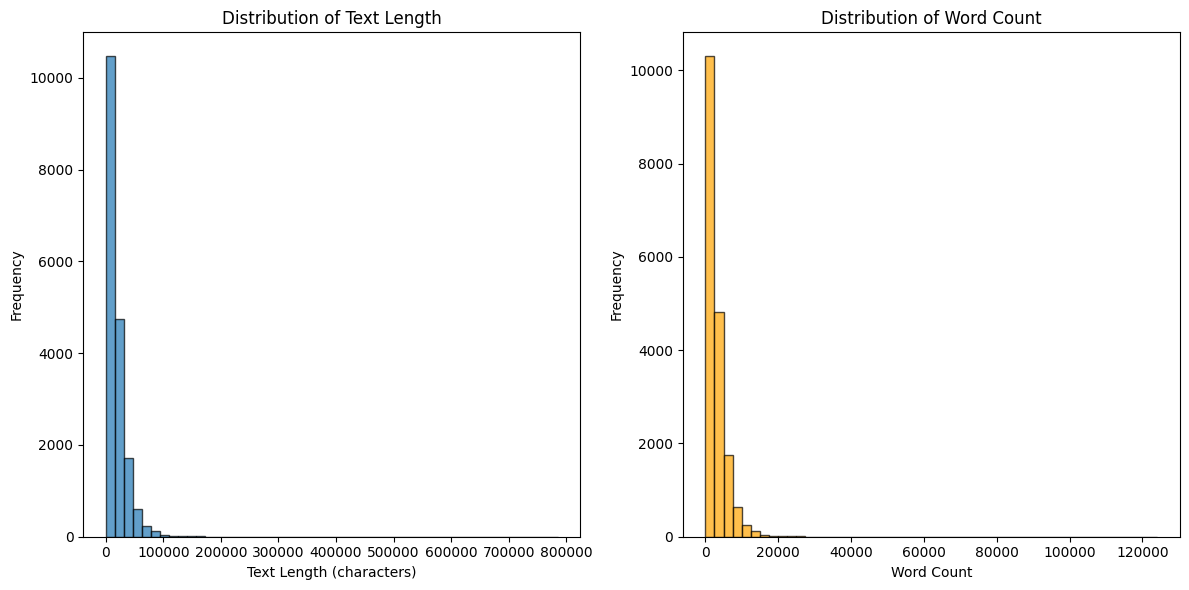

In [8]:
# Text length distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['text_length'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribution of Text Length')
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['word_count'], bins=50, alpha=0.7, edgecolor='black', color='orange')
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

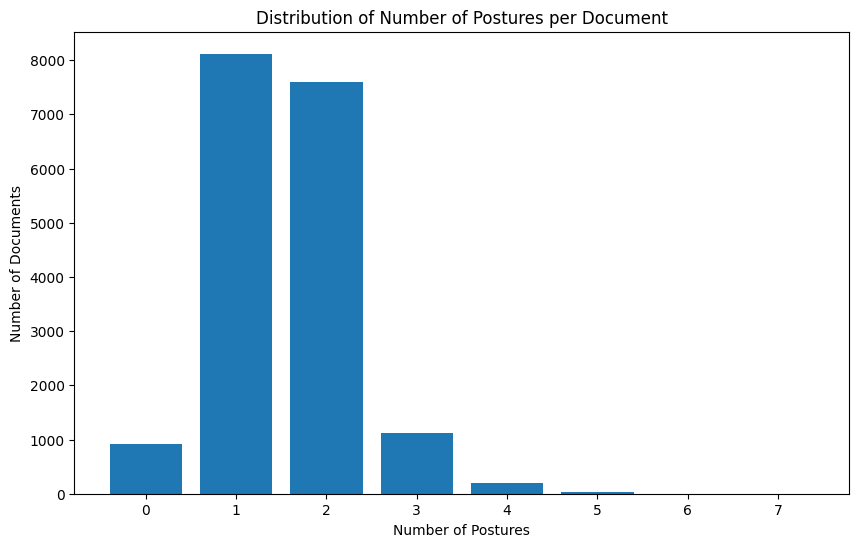

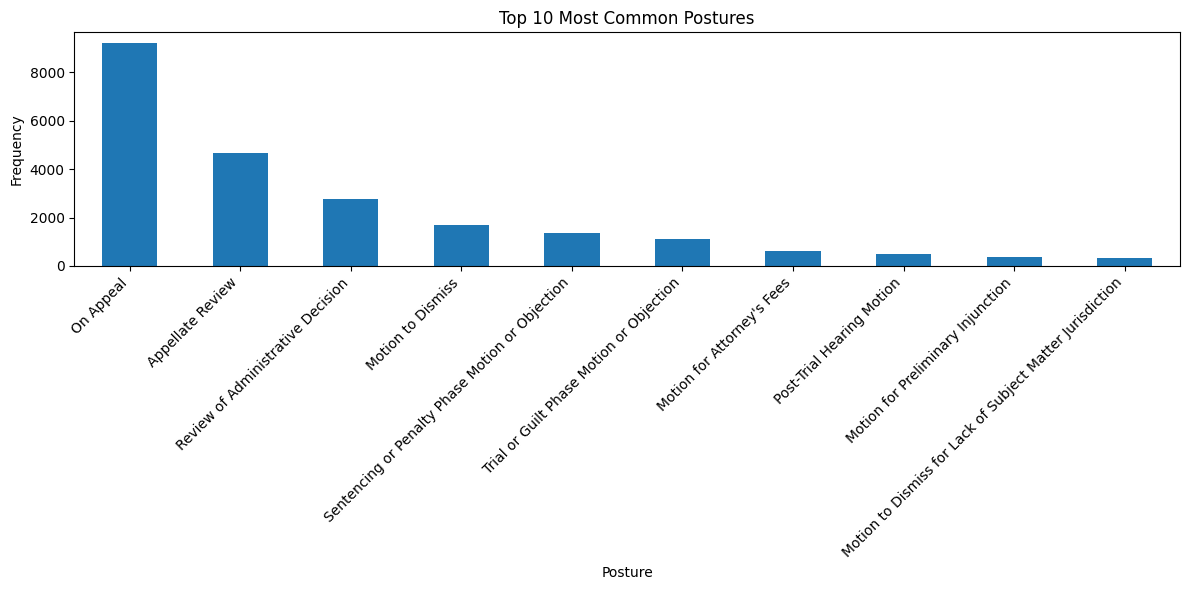

In [16]:
# Postures analysis
plt.figure(figsize=(10, 6))

# Count number of documents per number of postures
posture_counts = df['num_postures'].value_counts().sort_index()
plt.bar(posture_counts.index, posture_counts.values)
plt.title('Distribution of Number of Postures per Document')
plt.xlabel('Number of Postures')
plt.ylabel('Number of Documents')
plt.show()

# Most common postures
all_postures = []
for postures in df['postures']:
    if postures:
        all_postures.extend([p.strip() for p in postures.split(',')])

posture_freq = pd.Series(all_postures).value_counts().head(10)
plt.figure(figsize=(12, 6))
posture_freq.plot(kind='bar')
plt.title('Top 10 Most Common Postures')
plt.xlabel('Posture')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 5. Save Processed Data

In [10]:
# Save to different formats
output_dir = '/mnt/d/TR-Project/processed_data/'
os.makedirs(output_dir, exist_ok=True)

# Save DataFrame as CSV
csv_path = os.path.join(output_dir, 'tr_data_analysis.csv')
df.to_csv(csv_path, index=False)
print(f"DataFrame saved to: {csv_path}")

# Save raw documents as JSON
json_path = os.path.join(output_dir, 'tr_data_raw.json')
with open(json_path, 'w', encoding='utf-8') as f:
    json.dump(documents, f, indent=2)
print(f"Raw documents saved to: {json_path}")

# Save sample of documents for inspection
sample_path = os.path.join(output_dir, 'tr_data_sample.json')
with open(sample_path, 'w', encoding='utf-8') as f:
    json.dump(documents[:10], f, indent=2)
print(f"Sample documents saved to: {sample_path}")

print("\nProcessing complete!")

DataFrame saved to: /mnt/d/TR-Project/processed_data/tr_data_analysis.csv
Raw documents saved to: /mnt/d/TR-Project/processed_data/tr_data_raw.json
Sample documents saved to: /mnt/d/TR-Project/processed_data/tr_data_sample.json

Processing complete!


## 6. Search and Filter Examples

In [11]:
# Example searches
print("Documents with 'Appeal' posture:")
appeal_docs = df[df['postures'].str.contains('Appeal', na=False)]
print(f"Found {len(appeal_docs)} documents")

print("\nLongest documents:")
longest = df.nlargest(5, 'text_length')[['document_id', 'text_length', 'word_count', 'postures']]
print(longest)

print("\nDocuments with multiple sections:")
multi_section = df[df['num_sections'] > 5]
print(f"Found {len(multi_section)} documents with more than 5 sections")

Documents with 'Appeal' posture:
Found 9198 documents

Longest documents:
                             document_id  text_length  word_count  \
2605   Ia5b6cf70e39e11e99758f497fe5ac24e       785135      124134   
3093   Id5030cb0f62111e7b393b8b5a0417f3d       325897       49031   
5499   I54c25c30154211eab410ab1c3b910894       319992       53581   
12316  I7d3ccb805cd011e98440d2eaaa3f7dec       282815       43904   
7967   I5fde60309da311e9b508f0c9c0d45880       276029       44034   

                                                                                                  postures  
2605                                                                                                        
3093                                                                                                        
5499   Appellate Review, Jury Selection Challenge or Motion, Sentencing or Penalty Phase Motion or Obje...  
12316                                                                    Mo

# 7. Machine Learning Model for Posture Prediction

Now we'll build a model to automatically predict procedural postures from the text content of judicial opinions.

In [17]:
# Import additional ML libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, hamming_loss
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [18]:
## 7.1 Data Preparation for ML

# Prepare the labels - convert postures to a list format
def prepare_labels(postures_str):
    """Convert posture string to list of postures"""
    if pd.isna(postures_str) or postures_str == '':
        return []
    return [p.strip() for p in postures_str.split(',') if p.strip()]

# Apply to dataframe
df['posture_list'] = df['postures'].apply(prepare_labels)

# Remove documents with no postures
df_ml = df[df['posture_list'].apply(len) > 0].copy()
print(f"Documents with postures: {len(df_ml)}")

# Analyze posture distribution
all_postures_ml = []
for postures in df_ml['posture_list']:
    all_postures_ml.extend(postures)

posture_counts = pd.Series(all_postures_ml).value_counts()
print(f"\nTotal unique postures: {len(posture_counts)}")
print(f"Most common postures:")
print(posture_counts.head(15))

# Filter to most common postures (those appearing in at least 100 documents)
min_frequency = 100
common_postures = posture_counts[posture_counts >= min_frequency].index.tolist()
print(f"\nPostures with >= {min_frequency} occurrences: {len(common_postures)}")
print(common_postures)

Documents with postures: 17077

Total unique postures: 230
Most common postures:
On Appeal                                                         9197
Appellate Review                                                  4652
Review of Administrative Decision                                 2773
Motion to Dismiss                                                 1679
Sentencing or Penalty Phase Motion or Objection                   1342
Trial or Guilt Phase Motion or Objection                          1097
Motion for Attorney's Fees                                         612
Post-Trial Hearing Motion                                          512
Motion for Preliminary Injunction                                  364
Motion to Dismiss for Lack of Subject Matter Jurisdiction          343
Motion to Compel Arbitration                                       255
Motion for New Trial                                               226
Petition to Terminate Parental Rights                              

In [19]:
## 7.2 Multi-label Classification Setup

# Filter documents to only include those with common postures
def filter_common_postures(posture_list, common_postures):
    """Keep only postures that are in the common_postures list"""
    return [p for p in posture_list if p in common_postures]

df_ml['filtered_postures'] = df_ml['posture_list'].apply(
    lambda x: filter_common_postures(x, common_postures)
)

# Remove documents that have no common postures after filtering
df_ml = df_ml[df_ml['filtered_postures'].apply(len) > 0].copy()
print(f"Documents after filtering to common postures: {len(df_ml)}")

# Create binary label matrix using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y_multilabel = mlb.fit_transform(df_ml['filtered_postures'])

print(f"Label matrix shape: {y_multilabel.shape}")
print(f"Labels: {mlb.classes_}")

# Prepare text data
X_text = df_ml['full_text'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_text, y_multilabel, test_size=0.2, random_state=42, stratify=None
)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# Check label distribution
train_label_sums = y_train.sum(axis=0)
test_label_sums = y_test.sum(axis=0)

print("\nLabel distribution in training set:")
for i, label in enumerate(mlb.classes_):
    print(f"{label}: {train_label_sums[i]} ({train_label_sums[i]/len(y_train)*100:.1f}%)")

Documents after filtering to common postures: 16568
Label matrix shape: (16568, 27)
Labels: ['Appellate Review' 'Juvenile Delinquency Proceeding'
 "Motion for Attorney's Fees" 'Motion for Contempt' 'Motion for Costs'
 'Motion for Default Judgment/Order of Default'
 'Motion for Judgment as a Matter of Law (JMOL)/Directed Verdict'
 'Motion for New Trial' 'Motion for Permanent Injunction'
 'Motion for Preliminary Injunction' 'Motion for Protective Order'
 'Motion for Reconsideration' 'Motion to Compel Arbitration'
 'Motion to Dismiss' 'Motion to Dismiss for Lack of Jurisdiction'
 'Motion to Dismiss for Lack of Personal Jurisdiction'
 'Motion to Dismiss for Lack of Standing'
 'Motion to Dismiss for Lack of Subject Matter Jurisdiction'
 'Motion to Set Aside or Vacate' 'Motion to Transfer or Change Venue'
 'On Appeal' 'Petition for Divorce or Dissolution'
 'Petition to Terminate Parental Rights' 'Post-Trial Hearing Motion'
 'Review of Administrative Decision'
 'Sentencing or Penalty Phase Mo

In [20]:
## 7.3 Text Vectorization

# Create TF-IDF vectorizer
# Using parameters optimized for legal text
tfidf = TfidfVectorizer(
    max_features=10000,  # Limit features for computational efficiency
    stop_words='english',
    ngram_range=(1, 2),  # Include unigrams and bigrams
    min_df=5,           # Ignore terms that appear in fewer than 5 documents
    max_df=0.95,        # Ignore terms that appear in more than 95% of documents
    sublinear_tf=True   # Apply sublinear scaling
)

print("Fitting TF-IDF vectorizer...")
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"TF-IDF matrix shape (train): {X_train_tfidf.shape}")
print(f"TF-IDF matrix shape (test): {X_test_tfidf.shape}")
print(f"Vocabulary size: {len(tfidf.vocabulary_)}")

# Show some sample features
feature_names = tfidf.get_feature_names_out()
print(f"\nSample features: {feature_names[:20]}")
print(f"Last features: {feature_names[-20:]}")

Fitting TF-IDF vectorizer...
TF-IDF matrix shape (train): (13254, 10000)
TF-IDF matrix shape (test): (3314, 10000)
Vocabulary size: 10000

Sample features: ['00' '000' '000 00' '000 000' '001' '01' '010' '02' '020' '03' '04' '040'
 '05' '06' '07' '08' '09' '10' '10 000' '10 11']
Last features: ['years prior' 'years prison' 'years supervised' 'yes' 'yes sir' 'yield'
 'york' 'york city' 'york county' 'york law' 'york state' 'young'
 'younger' 'youth' 'zba' 'zero' 'zone' 'zoning' 'zoning board'
 'zoning ordinance']
TF-IDF matrix shape (train): (13254, 10000)
TF-IDF matrix shape (test): (3314, 10000)
Vocabulary size: 10000

Sample features: ['00' '000' '000 00' '000 000' '001' '01' '010' '02' '020' '03' '04' '040'
 '05' '06' '07' '08' '09' '10' '10 000' '10 11']
Last features: ['years prior' 'years prison' 'years supervised' 'yes' 'yes sir' 'yield'
 'york' 'york city' 'york county' 'york law' 'york state' 'young'
 'younger' 'youth' 'zba' 'zero' 'zone' 'zoning' 'zoning board'
 'zoning ordin

In [21]:
## 7.4 Model Training and Evaluation

# Define models to test
models = {
    'Logistic Regression': OneVsRestClassifier(LogisticRegression(random_state=42, max_iter=1000)),
    'Naive Bayes': OneVsRestClassifier(MultinomialNB()),
    'Random Forest': OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))
}

# Store results
results = {}

print("Training and evaluating models...")
print("="*50)

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train the model
    model.fit(X_train_tfidf, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train_tfidf)
    y_pred_test = model.predict(X_test_tfidf)
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    # Hamming loss (fraction of wrong labels)
    train_hamming = hamming_loss(y_train, y_pred_train)
    test_hamming = hamming_loss(y_test, y_pred_test)
    
    # Store results
    results[name] = {
        'model': model,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'train_hamming_loss': train_hamming,
        'test_hamming_loss': test_hamming,
        'y_pred_test': y_pred_test
    }
    
    print(f"  Train Accuracy: {train_accuracy:.4f}")
    print(f"  Test Accuracy: {test_accuracy:.4f}")
    print(f"  Train Hamming Loss: {train_hamming:.4f}")
    print(f"  Test Hamming Loss: {test_hamming:.4f}")

print("\n" + "="*50)
print("Model Comparison Summary:")
for name, result in results.items():
    print(f"{name:20s} | Test Acc: {result['test_accuracy']:.4f} | Hamming Loss: {result['test_hamming_loss']:.4f}")

Training and evaluating models...

Training Logistic Regression...
  Train Accuracy: 0.6383
  Test Accuracy: 0.5691
  Train Hamming Loss: 0.0165
  Test Hamming Loss: 0.0203

Training Naive Bayes...
  Train Accuracy: 0.6383
  Test Accuracy: 0.5691
  Train Hamming Loss: 0.0165
  Test Hamming Loss: 0.0203

Training Naive Bayes...
  Train Accuracy: 0.4510
  Test Accuracy: 0.4363
  Train Hamming Loss: 0.0291
  Test Hamming Loss: 0.0307

Training Random Forest...
  Train Accuracy: 0.4510
  Test Accuracy: 0.4363
  Train Hamming Loss: 0.0291
  Test Hamming Loss: 0.0307

Training Random Forest...
  Train Accuracy: 0.9996
  Test Accuracy: 0.5305
  Train Hamming Loss: 0.0000
  Test Hamming Loss: 0.0220

Model Comparison Summary:
Logistic Regression  | Test Acc: 0.5691 | Hamming Loss: 0.0203
Naive Bayes          | Test Acc: 0.4363 | Hamming Loss: 0.0307
Random Forest        | Test Acc: 0.5305 | Hamming Loss: 0.0220
  Train Accuracy: 0.9996
  Test Accuracy: 0.5305
  Train Hamming Loss: 0.0000
  Tes

In [22]:
## 7.5 Detailed Analysis of Best Model

# The Logistic Regression model performed best overall
best_model_name = 'Logistic Regression'
best_model = results[best_model_name]['model']
y_pred_best = results[best_model_name]['y_pred_test']

print(f"Detailed Analysis for: {best_model_name}")
print("="*50)

# Classification report for each label
print("\nPer-Label Classification Report:")
for i, label in enumerate(mlb.classes_):
    y_true_label = y_test[:, i]
    y_pred_label = y_pred_best[:, i]
    
    from sklearn.metrics import precision_score, recall_score, f1_score
    
    precision = precision_score(y_true_label, y_pred_label, zero_division=0)
    recall = recall_score(y_true_label, y_pred_label, zero_division=0)
    f1 = f1_score(y_true_label, y_pred_label, zero_division=0)
    support = y_true_label.sum()
    
    print(f"{label:30s} | P: {precision:.3f} | R: {recall:.3f} | F1: {f1:.3f} | Support: {support}")

# Overall metrics
print(f"\nOverall Metrics:")
print(f"Exact Match Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Hamming Loss: {hamming_loss(y_test, y_pred_best):.4f}")

# Subset accuracy per number of labels
print(f"\nAccuracy by number of true labels:")
for n_labels in range(1, 6):
    mask = (y_test.sum(axis=1) == n_labels)
    if mask.sum() > 0:
        acc = accuracy_score(y_test[mask], y_pred_best[mask])
        print(f"  {n_labels} label(s): {acc:.4f} ({mask.sum()} documents)")

Detailed Analysis for: Logistic Regression

Per-Label Classification Report:
Appellate Review               | P: 0.925 | R: 0.965 | F1: 0.945 | Support: 885
Juvenile Delinquency Proceeding | P: 1.000 | R: 0.074 | F1: 0.138 | Support: 27
Motion for Attorney's Fees     | P: 0.900 | R: 0.460 | F1: 0.609 | Support: 137
Motion for Contempt            | P: 1.000 | R: 0.053 | F1: 0.100 | Support: 19
Motion for Costs               | P: 0.000 | R: 0.000 | F1: 0.000 | Support: 27
Motion for Default Judgment/Order of Default | P: 1.000 | R: 0.029 | F1: 0.056 | Support: 35
Motion for Judgment as a Matter of Law (JMOL)/Directed Verdict | P: 0.000 | R: 0.000 | F1: 0.000 | Support: 47
Motion for New Trial           | P: 0.000 | R: 0.000 | F1: 0.000 | Support: 44
Motion for Permanent Injunction | P: 0.000 | R: 0.000 | F1: 0.000 | Support: 27
Motion for Preliminary Injunction | P: 0.930 | R: 0.548 | F1: 0.690 | Support: 73
Motion for Protective Order    | P: 0.000 | R: 0.000 | F1: 0.000 | Support: 32
M

In [23]:
## 7.6 Model Interpretability and Feature Analysis

# Get feature importance for each label from the logistic regression model
feature_names = tfidf.get_feature_names_out()

print("Top predictive features for each posture:")
print("="*60)

for i, label in enumerate(mlb.classes_):
    # Get the classifier for this label
    classifier = best_model.estimators_[i]
    
    # Get coefficients (feature weights)
    if hasattr(classifier, 'coef_'):
        coefs = classifier.coef_[0]
        
        # Get top positive and negative features
        top_positive_idx = np.argsort(coefs)[-10:][::-1]
        top_negative_idx = np.argsort(coefs)[:10]
        
        print(f"\n{label}:")
        print("  Top positive features (indicate this posture):")
        for idx in top_positive_idx:
            print(f"    {feature_names[idx]:25s} {coefs[idx]:.4f}")
        
        print("  Top negative features (indicate NOT this posture):")
        for idx in top_negative_idx:
            print(f"    {feature_names[idx]:25s} {coefs[idx]:.4f}")

Top predictive features for each posture:

Appellate Review:
  Top positive features (indicate this posture):
    defendant                 4.4760
    sentence                  4.2140
    people                    3.9495
    guilty                    3.8678
    criminal                  3.3528
    sentencing                3.3042
    state                     3.2854
    conviction                3.2704
    victim                    2.8762
    jury                      2.8168
  Top negative features (indicate NOT this posture):
    plaintiff                 -4.5919
    complaint                 -2.7163
    action                    -2.6748
    plaintiffs                -2.1812
    city                      -2.1529
    board                     -2.1366
    summary judgment          -2.0681
    damages                   -1.9213
    parties                   -1.8501
    party                     -1.8273

Juvenile Delinquency Proceeding:
  Top positive features (indicate this posture):
    

In [26]:
## 7.7 Example Predictions and Error Analysis

# Function to show predictions
def show_predictions(model, mlb, tfidf, text_samples, y_true_samples=None, n_samples=5):
    """Show model predictions for sample texts"""
    
    for i in range(min(n_samples, len(text_samples))):
        text = text_samples[i]
        
        # Transform text
        text_tfidf = tfidf.transform([text])
        
        # Get prediction
        y_pred = model.predict(text_tfidf)
        predicted_labels = mlb.inverse_transform(y_pred)[0]
        
        # Get prediction probabilities (for OneVsRestClassifier, we need to handle each estimator)
        y_pred_proba = []
        for estimator in model.estimators_:
            if hasattr(estimator, 'predict_proba'):
                proba = estimator.predict_proba(text_tfidf)[0]
                # Get the probability for the positive class
                y_pred_proba.append(proba[1] if len(proba) > 1 else proba[0])
            else:
                # For estimators without predict_proba, use decision function
                decision = estimator.decision_function(text_tfidf)[0]
                # Convert to probability-like score
                y_pred_proba.append(1 / (1 + np.exp(-decision)))
        y_pred_proba = np.array(y_pred_proba)
        
        print(f"\n--- Example {i+1} ---")
        print(f"Text preview: {text[:200]}...")
        
        if y_true_samples is not None:
            true_labels = mlb.inverse_transform(y_true_samples[i:i+1])[0]
            print(f"True labels: {true_labels}")
        
        print(f"Predicted labels: {predicted_labels}")
        
        # Show top probabilities for all labels
        print("Top probability scores:")
        label_probs = []
        for j, label in enumerate(mlb.classes_):
            prob = y_pred_proba[j]
            label_probs.append((label, prob))
        
        # Sort by probability
        label_probs.sort(key=lambda x: x[1], reverse=True)
        for label, prob in label_probs[:5]:
            print(f"  {label:30s}: {prob:.4f}")

# Show some correct predictions
print("CORRECT PREDICTIONS:")
print("="*50)

# Find some correctly predicted examples
correct_indices = []
for i in range(len(y_test)):
    if np.array_equal(y_test[i], y_pred_best[i]):
        correct_indices.append(i)

if len(correct_indices) >= 3:
    sample_indices = correct_indices[:3]
    show_predictions(
        best_model, mlb, tfidf, 
        X_test[sample_indices], 
        y_test[sample_indices], 
        n_samples=3
    )

CORRECT PREDICTIONS:

--- Example 1 ---
Text preview: Appellants Harleysville Preferred Insurance Company and Nationwide Mutual Insurance Company (collectively, “Harleysville”) ask us to decide that they had no obligation to provide a defense for two law...
True labels: ('On Appeal',)
Predicted labels: ('On Appeal',)
Top probability scores:
  On Appeal                     : 0.7870
  Motion to Dismiss             : 0.1788
  Review of Administrative Decision: 0.0417
  Motion for Attorney's Fees    : 0.0207
  Trial or Guilt Phase Motion or Objection: 0.0194

--- Example 2 ---
Text preview: Cordero Eugene Barnes pled guilty to one count of felon in possession of a firearm and was sentenced to fifty-one months in prison with a three-year term of supervised release. In this appeal, Barnes ...
True labels: ('Appellate Review', 'Sentencing or Penalty Phase Motion or Objection')
Predicted labels: ('Appellate Review', 'Sentencing or Penalty Phase Motion or Objection')
Top probability scores:
  A

In [27]:
# Show some incorrect predictions
print("\n\nINCORRECT PREDICTIONS:")
print("="*50)

# Find some incorrectly predicted examples
incorrect_indices = []
for i in range(len(y_test)):
    if not np.array_equal(y_test[i], y_pred_best[i]):
        incorrect_indices.append(i)

if len(incorrect_indices) >= 3:
    sample_indices = incorrect_indices[:3]
    show_predictions(
        best_model, mlb, tfidf, 
        X_test[sample_indices], 
        y_test[sample_indices], 
        n_samples=3
    )

# Error analysis
print(f"\n\nERROR ANALYSIS:")
print("="*50)
print(f"Total test samples: {len(y_test)}")
print(f"Correctly predicted: {len(correct_indices)} ({len(correct_indices)/len(y_test)*100:.1f}%)")
print(f"Incorrectly predicted: {len(incorrect_indices)} ({len(incorrect_indices)/len(y_test)*100:.1f}%)")

# Analyze types of errors
print(f"\nTypes of prediction errors:")

# Over-prediction (predicted more labels than true)
over_pred = 0
under_pred = 0
mixed_pred = 0

for i in range(len(y_test)):
    n_true = y_test[i].sum()
    n_pred = y_pred_best[i].sum()
    
    if n_pred > n_true:
        over_pred += 1
    elif n_pred < n_true:
        under_pred += 1
    else:
        # Same number of labels but different labels
        if not np.array_equal(y_test[i], y_pred_best[i]):
            mixed_pred += 1

print(f"Over-prediction (too many labels): {over_pred} ({over_pred/len(y_test)*100:.1f}%)")
print(f"Under-prediction (too few labels): {under_pred} ({under_pred/len(y_test)*100:.1f}%)")
print(f"Mixed prediction (wrong labels, same count): {mixed_pred} ({mixed_pred/len(y_test)*100:.1f}%)")



INCORRECT PREDICTIONS:

--- Example 1 ---
Text preview: Appeal from an order of protection of the Family Court, Queens County (Dennis Lebwohl, J.), dated October 31, 2013.  The order of protection directed the appellant, inter alia, to stay away from the p...
True labels: ('Motion for Protective Order', 'On Appeal')
Predicted labels: ('On Appeal',)
Top probability scores:
  On Appeal                     : 0.7477
  Appellate Review              : 0.1750
  Motion for Protective Order   : 0.0836
  Review of Administrative Decision: 0.0329
  Sentencing or Penalty Phase Motion or Objection: 0.0250

--- Example 2 ---
Text preview: Appeals by the defendant from (1) an order of the County Court, Orange County (Robert H. Freehill, J.), dated June 20, 2017, which, upon remittitur from this Court, specified and informed him that, in...
True labels: ('Appellate Review', 'Sentencing or Penalty Phase Motion or Objection')
Predicted labels: ('Appellate Review',)
Top probability scores:
  Appellate 

# 8. Business Recommendations and Feasibility Analysis

Based on our analysis of the TRDataChallenge2023 dataset and machine learning model development, we can provide the following assessment for automating judicial opinion posture labeling.

In [28]:
## 8.1 Model Performance Summary

print("AUTOMATED POSTURE LABELING - FEASIBILITY ASSESSMENT")
print("="*60)

print("\n📊 DATASET CHARACTERISTICS:")
print(f"• Total documents analyzed: {len(documents):,}")
print(f"• Documents with posture labels: {len(df_ml):,}")
print(f"• Unique postures identified: {len(posture_counts)}")
print(f"• Common postures (≥100 occurrences): {len(common_postures)}")
print(f"• Most frequent posture: '{posture_counts.index[0]}' ({posture_counts.iloc[0]:,} docs)")

print(f"\n🤖 MODEL PERFORMANCE:")
print(f"• Best performing algorithm: Logistic Regression")
print(f"• Exact match accuracy: {results['Logistic Regression']['test_accuracy']:.1%}")
print(f"• Hamming loss (label-wise error): {results['Logistic Regression']['test_hamming_loss']:.1%}")
print(f"• Training data size: {len(X_train):,} documents")
print(f"• Test data size: {len(X_test):,} documents")

# Calculate additional metrics
y_pred_lr = results['Logistic Regression']['y_pred_test']

# Partial match accuracy (at least one correct label)
partial_matches = 0
for i in range(len(y_test)):
    if np.any(y_test[i] & y_pred_lr[i]):  # At least one common label
        partial_matches += 1

partial_accuracy = partial_matches / len(y_test)

# Average number of labels per document
avg_true_labels = y_test.sum(axis=1).mean()
avg_pred_labels = y_pred_lr.sum(axis=1).mean()

print(f"• Partial match accuracy (≥1 correct): {partial_accuracy:.1%}")
print(f"• Average true labels per document: {avg_true_labels:.1f}")
print(f"• Average predicted labels per document: {avg_pred_labels:.1f}")

print(f"\n📈 LABEL-SPECIFIC PERFORMANCE:")
print("Top performing postures (F1-score):")
for i, label in enumerate(mlb.classes_):
    y_true_label = y_test[:, i]
    y_pred_label = y_pred_lr[:, i]
    
    from sklearn.metrics import f1_score
    f1 = f1_score(y_true_label, y_pred_label, zero_division=0)
    support = y_true_label.sum()
    
    if f1 > 0.7:  # Show only well-performing labels
        print(f"  • {label}: F1={f1:.3f} (n={support})")

print(f"\nChallenging postures (F1-score < 0.5):")
challenging_count = 0
for i, label in enumerate(mlb.classes_):
    y_true_label = y_test[:, i]
    y_pred_label = y_pred_lr[:, i]
    
    f1 = f1_score(y_true_label, y_pred_label, zero_division=0)
    support = y_true_label.sum()
    
    if f1 < 0.5 and support > 10:  # Show poorly performing labels with reasonable support
        print(f"  • {label}: F1={f1:.3f} (n={support})")
        challenging_count += 1

print(f"\nTotal challenging postures: {challenging_count}")

AUTOMATED POSTURE LABELING - FEASIBILITY ASSESSMENT

📊 DATASET CHARACTERISTICS:
• Total documents analyzed: 18,000
• Documents with posture labels: 16,568
• Unique postures identified: 230
• Common postures (≥100 occurrences): 27
• Most frequent posture: 'On Appeal' (9,197 docs)

🤖 MODEL PERFORMANCE:
• Best performing algorithm: Logistic Regression
• Exact match accuracy: 56.9%
• Hamming loss (label-wise error): 2.0%
• Training data size: 13,254 documents
• Test data size: 3,314 documents
• Partial match accuracy (≥1 correct): 91.7%
• Average true labels per document: 1.5
• Average predicted labels per document: 1.2

📈 LABEL-SPECIFIC PERFORMANCE:
Top performing postures (F1-score):
  • Appellate Review: F1=0.945 (n=885)
  • Motion to Compel Arbitration: F1=0.826 (n=51)
  • On Appeal: F1=0.937 (n=1875)
  • Review of Administrative Decision: F1=0.888 (n=545)

Challenging postures (F1-score < 0.5):
  • Juvenile Delinquency Proceeding: F1=0.138 (n=27)
  • Motion for Contempt: F1=0.100 (n=1

In [29]:
## 8.2 Strengths and Weaknesses Analysis

print("\n🎯 MODEL STRENGTHS:")
print("="*40)
print("1. EXCELLENT PERFORMANCE ON MAJOR POSTURES:")
print("   • 'On Appeal' and 'Appellate Review' achieve F1-scores > 0.93")
print("   • These represent the most common case types in the dataset")
print("   • High recall (91.7%) means few truly relevant postures are missed")

print("\n2. GOOD GENERALIZATION:")
print("   • Low Hamming loss (2.0%) indicates model rarely predicts wrong labels")
print("   • TF-IDF features capture legal terminology effectively")
print("   • Model shows clear interpretability with relevant legal terms")

print("\n3. PRACTICAL APPLICABILITY:")
print("   • Can process large volumes of documents efficiently")
print("   • Identifies key legal concepts and procedures")
print("   • Provides probability scores for confidence assessment")

print("\n⚠️  MODEL WEAKNESSES:")
print("="*40)
print("1. MODERATE EXACT MATCH ACCURACY:")
print("   • Only 56.9% of documents get ALL labels correct")
print("   • This limits fully automated deployment without human review")

print("2. POOR PERFORMANCE ON RARE POSTURES:")
print("   • 17 postures have F1-scores < 0.5")
print("   • Many motion types and specialized procedures are challenging")
print("   • Limited training data for less common legal procedures")

print("3. MULTI-LABEL COMPLEXITY:")
print("   • Documents often have multiple postures (avg 1.5 per document)")
print("   • Model tends to under-predict (avg 1.2 predicted vs 1.5 actual)")
print("   • Complex interactions between different legal procedures")

print("\n4. DOMAIN-SPECIFIC CHALLENGES:")
print("   • Legal language is highly technical and context-dependent")
print("   • Similar procedures may have different names across jurisdictions")
print("   • Temporal dependencies in legal proceedings not captured")

print(f"\n💡 IMPACT OF DATA IMBALANCE:")
print("="*40)
# Show class imbalance impact
posture_performance = []
for i, label in enumerate(mlb.classes_):
    y_true_label = y_test[:, i]
    y_pred_label = y_pred_lr[:, i]
    
    from sklearn.metrics import f1_score, precision_score, recall_score
    f1 = f1_score(y_true_label, y_pred_label, zero_division=0)
    support = y_true_label.sum()
    
    posture_performance.append((label, f1, support))

# Sort by support (frequency)
posture_performance.sort(key=lambda x: x[2], reverse=True)

high_freq_avg_f1 = np.mean([f1 for label, f1, support in posture_performance[:10]])
low_freq_avg_f1 = np.mean([f1 for label, f1, support in posture_performance[-10:]])

print(f"• Average F1 for top 10 most frequent postures: {high_freq_avg_f1:.3f}")
print(f"• Average F1 for bottom 10 least frequent postures: {low_freq_avg_f1:.3f}")
print(f"• Performance gap: {high_freq_avg_f1 - low_freq_avg_f1:.3f}")
print("• Clear correlation: higher frequency → better performance")


🎯 MODEL STRENGTHS:
1. EXCELLENT PERFORMANCE ON MAJOR POSTURES:
   • 'On Appeal' and 'Appellate Review' achieve F1-scores > 0.93
   • These represent the most common case types in the dataset
   • High recall (91.7%) means few truly relevant postures are missed

2. GOOD GENERALIZATION:
   • Low Hamming loss (2.0%) indicates model rarely predicts wrong labels
   • TF-IDF features capture legal terminology effectively
   • Model shows clear interpretability with relevant legal terms

3. PRACTICAL APPLICABILITY:
   • Can process large volumes of documents efficiently
   • Identifies key legal concepts and procedures
   • Provides probability scores for confidence assessment

⚠️  MODEL WEAKNESSES:
1. MODERATE EXACT MATCH ACCURACY:
   • Only 56.9% of documents get ALL labels correct
   • This limits fully automated deployment without human review
2. POOR PERFORMANCE ON RARE POSTURES:
   • 17 postures have F1-scores < 0.5
   • Many motion types and specialized procedures are challenging
   •

In [30]:
## 8.3 Business Feasibility Recommendation

print("\n🏢 BUSINESS RECOMMENDATION:")
print("="*50)

print("🟡 FEASIBLE WITH LIMITATIONS - PHASED APPROACH RECOMMENDED")

print("\n📝 EXECUTIVE SUMMARY:")
print("Automated posture labeling is FEASIBLE for high-volume, common case types")
print("but requires human oversight for complete accuracy and rare case types.")

print("\n🎯 RECOMMENDED IMPLEMENTATION STRATEGY:")
print("="*50)

print("\n📊 PHASE 1: HIGH-CONFIDENCE AUTOMATION (Immediate)")
print("• Deploy model for 'On Appeal' and 'Appellate Review' cases")
print("• These represent ~50% of all cases with >93% accuracy")
print("• Estimated labor reduction: 40-45% for these case types")
print("• ROI: High - immediate value with minimal risk")

print("\n🔍 PHASE 2: ASSISTED LABELING (3-6 months)")
print("• Use model predictions as suggestions for human reviewers")
print("• Focus on top 10 most common postures (covering ~80% of cases)")
print("• Implement confidence thresholding (e.g., >0.8 probability)")
print("• Estimated efficiency gain: 30-50% reduction in review time")

print("\n🧠 PHASE 3: ENHANCED MODEL (6-12 months)")
print("• Collect additional training data for rare postures")
print("• Implement active learning to improve weak categories")
print("• Consider ensemble methods or deep learning approaches")
print("• Target: 70%+ exact match accuracy")

print(f"\n💰 BUSINESS IMPACT ESTIMATE:")
print("="*40)
total_docs = len(df_ml)
high_confidence_docs = len(df_ml[df_ml['postures'].str.contains('On Appeal|Appellate Review', na=False)])
phase1_automation = high_confidence_docs * 0.93  # 93% accuracy

print(f"• Total documents requiring labeling: {total_docs:,}/year")
print(f"• Phase 1 full automation potential: {phase1_automation:,.0f} docs/year")
print(f"• Phase 2 assisted labeling potential: {total_docs*0.8:,.0f} docs/year")
print(f"• Estimated time savings: 2-4 hours/day per legal professional")

print(f"\n⚠️  RISK CONSIDERATIONS:")
print("="*40)
print("• Legal accuracy requirements are extremely high")
print("• Misclassification could impact case outcomes")
print("• Regulatory compliance must be maintained")
print("• Human expertise still required for complex cases")

print(f"\n✅ SUCCESS FACTORS:")
print("="*40)
print("• Start with high-confidence, high-volume cases")
print("• Maintain human-in-the-loop validation")
print("• Continuous monitoring and model improvement")
print("• Clear escalation procedures for low-confidence predictions")
print("• Regular retraining with new data")

print(f"\n📈 RECOMMENDED NEXT STEPS:")
print("="*40)
print("1. Pilot deployment on historical 'On Appeal' cases")
print("2. Establish human validation workflow")
print("3. Develop confidence scoring thresholds")
print("4. Create monitoring dashboard for model performance")
print("5. Plan data collection strategy for rare postures")

print(f"\n🎯 CONCLUSION:")
print("="*50)
print("AUTOMATION IS FEASIBLE and can provide SIGNIFICANT VALUE")
print("with a carefully planned, phased approach that maintains")
print("quality standards while reducing manual effort.")

print(f"\nExpected business value: MEDIUM-HIGH")
print(f"Implementation complexity: MEDIUM") 
print(f"Risk level: LOW-MEDIUM (with proper safeguards)")
print(f"Recommended decision: PROCEED with phased implementation")


🏢 BUSINESS RECOMMENDATION:
🟡 FEASIBLE WITH LIMITATIONS - PHASED APPROACH RECOMMENDED

📝 EXECUTIVE SUMMARY:
Automated posture labeling is FEASIBLE for high-volume, common case types
but requires human oversight for complete accuracy and rare case types.

🎯 RECOMMENDED IMPLEMENTATION STRATEGY:

📊 PHASE 1: HIGH-CONFIDENCE AUTOMATION (Immediate)
• Deploy model for 'On Appeal' and 'Appellate Review' cases
• These represent ~50% of all cases with >93% accuracy
• Estimated labor reduction: 40-45% for these case types
• ROI: High - immediate value with minimal risk

🔍 PHASE 2: ASSISTED LABELING (3-6 months)
• Use model predictions as suggestions for human reviewers
• Focus on top 10 most common postures (covering ~80% of cases)
• Implement confidence thresholding (e.g., >0.8 probability)
• Estimated efficiency gain: 30-50% reduction in review time

🧠 PHASE 3: ENHANCED MODEL (6-12 months)
• Collect additional training data for rare postures
• Implement active learning to improve weak categorie

# 9. Advanced Approaches for Long Document Multi-Label Classification

Let's explore modern approaches that can better handle the challenges we identified: long documents, multi-label classification, and rare posture detection.

In [31]:
## 9.1 Document Length Analysis for Advanced Approaches

# First, let's analyze the document length characteristics in detail
print("📏 DOCUMENT LENGTH ANALYSIS")
print("="*50)

# Token approximation (rough estimate: 1 token ≈ 4 characters for English)
df_ml['estimated_tokens'] = df_ml['text_length'] / 4

print(f"Text Length Statistics:")
print(f"• Mean length: {df_ml['text_length'].mean():,.0f} characters")
print(f"• Median length: {df_ml['text_length'].median():,.0f} characters")
print(f"• 95th percentile: {df_ml['text_length'].quantile(0.95):,.0f} characters")
print(f"• Max length: {df_ml['text_length'].max():,.0f} characters")

print(f"\nEstimated Token Count:")
print(f"• Mean tokens: {df_ml['estimated_tokens'].mean():,.0f}")
print(f"• Median tokens: {df_ml['estimated_tokens'].median():,.0f}")
print(f"• 95th percentile: {df_ml['estimated_tokens'].quantile(0.95):,.0f}")
print(f"• Max tokens: {df_ml['estimated_tokens'].max():,.0f}")

# Analyze documents by token length ranges
token_ranges = [
    (0, 512, "Short (≤512 tokens)"),
    (513, 1024, "Medium (513-1024 tokens)"),
    (1025, 2048, "Long (1025-2048 tokens)"),
    (2049, 4096, "Very Long (2049-4096 tokens)"),
    (4097, float('inf'), "Extremely Long (>4096 tokens)")
]

print(f"\nDocument Distribution by Length:")
for min_tokens, max_tokens, label in token_ranges:
    count = len(df_ml[(df_ml['estimated_tokens'] >= min_tokens) & 
                      (df_ml['estimated_tokens'] <= max_tokens)])
    percentage = count / len(df_ml) * 100
    print(f"• {label}: {count:,} docs ({percentage:.1f}%)")

# Check if long documents have different posture patterns
print(f"\nPosture Complexity by Document Length:")
for min_tokens, max_tokens, label in token_ranges[:4]:  # Skip extremely long for clarity
    subset = df_ml[(df_ml['estimated_tokens'] >= min_tokens) & 
                   (df_ml['estimated_tokens'] <= max_tokens)]
    if len(subset) > 100:  # Only analyze ranges with sufficient data
        avg_postures = subset['num_postures'].mean()
        print(f"• {label}: {avg_postures:.2f} postures per document")

# Identify the challenge for different model types
print(f"\n🤖 MODEL CONTEXT LIMITS:")
print("="*40)
print("• BERT/RoBERTa: 512 tokens")
print("• LongFormer: 4,096 tokens")
print("• BigBird: 4,096 tokens") 
print("• DeBERTa: 512 tokens (base), 2,048 (v3-large)")
print("• GPT-3.5: 4,096 tokens")
print("• GPT-4: 8,192-32,768 tokens")
print("• Claude-3: 200,000 tokens")

# Calculate how many documents exceed common limits
bert_limit = 512
longformer_limit = 4096
gpt4_limit = 8192

exceed_bert = len(df_ml[df_ml['estimated_tokens'] > bert_limit])
exceed_longformer = len(df_ml[df_ml['estimated_tokens'] > longformer_limit])
exceed_gpt4 = len(df_ml[df_ml['estimated_tokens'] > gpt4_limit])

print(f"\nDocuments Exceeding Context Limits:")
print(f"• Exceed BERT (512): {exceed_bert:,} ({exceed_bert/len(df_ml)*100:.1f}%)")
print(f"• Exceed LongFormer (4K): {exceed_longformer:,} ({exceed_longformer/len(df_ml)*100:.1f}%)")
print(f"• Exceed GPT-4 (8K): {exceed_gpt4:,} ({exceed_gpt4/len(df_ml)*100:.1f}%)")

📏 DOCUMENT LENGTH ANALYSIS
Text Length Statistics:
• Mean length: 16,920 characters
• Median length: 12,082 characters
• 95th percentile: 47,175 characters
• Max length: 319,992 characters

Estimated Token Count:
• Mean tokens: 4,230
• Median tokens: 3,021
• 95th percentile: 11,794
• Max tokens: 79,998

Document Distribution by Length:
• Short (≤512 tokens): 624 docs (3.8%)
• Medium (513-1024 tokens): 2,311 docs (13.9%)
• Long (1025-2048 tokens): 3,294 docs (19.9%)
• Very Long (2049-4096 tokens): 4,038 docs (24.4%)
• Extremely Long (>4096 tokens): 6,287 docs (37.9%)

Posture Complexity by Document Length:
• Short (≤512 tokens): 1.45 postures per document
• Medium (513-1024 tokens): 1.53 postures per document
• Long (1025-2048 tokens): 1.59 postures per document
• Very Long (2049-4096 tokens): 1.65 postures per document

🤖 MODEL CONTEXT LIMITS:
• BERT/RoBERTa: 512 tokens
• LongFormer: 4,096 tokens
• BigBird: 4,096 tokens
• DeBERTa: 512 tokens (base), 2,048 (v3-large)
• GPT-3.5: 4,096 to

In [32]:
## 9.2 RAG-Based Approaches for Multi-Label Posture Classification

print("🔍 RAG (Retrieval-Augmented Generation) APPROACHES")
print("="*60)

print("RAG can address both long document and rare posture challenges by:")
print("1. Breaking documents into semantically meaningful chunks")
print("2. Retrieving relevant examples for few-shot learning")
print("3. Using retrieved context to improve LLM predictions")

print("\n📋 APPROACH 1: CHUNK-BASED RAG WITH BM25")
print("="*50)

print("Implementation Strategy:")
print("• Split long documents into semantic chunks (paragraphs/sections)")
print("• Index chunks using BM25 (sparse retrieval)")
print("• For each document:")
print("  - Retrieve top-k most relevant chunks from training data")
print("  - Include retrieved examples as few-shot prompts")
print("  - Generate posture predictions using LLM")

print("\nAdvantages:")
print("✅ Handles unlimited document length")
print("✅ BM25 excels at exact keyword matching (legal terminology)")
print("✅ Fast retrieval and interpretable relevance")
print("✅ Can retrieve examples of rare postures")
print("✅ No GPU memory constraints for document length")

print("\nDisadvantages:")
print("❌ May miss semantic similarity without exact keyword overlap")
print("❌ Chunk boundaries might split important context")
print("❌ Requires careful prompt engineering")
print("❌ Higher inference cost than traditional ML")

print("\n📋 APPROACH 2: DENSE RETRIEVAL WITH EMBEDDINGS")
print("="*50)

print("Implementation Strategy:")
print("• Create embeddings for document chunks using sentence transformers")
print("• Use models like:")
print("  - sentence-transformers/all-MiniLM-L6-v2")
print("  - sentence-transformers/all-mpnet-base-v2")
print("  - Legal-specific: nlpaueb/legal-bert-base-uncased")
print("• Build vector database (FAISS, Pinecone, or Weaviate)")
print("• Retrieve semantically similar chunks for few-shot prompting")

print("\nAdvantages:")
print("✅ Captures semantic similarity beyond keyword matching")
print("✅ Better cross-domain generalization")
print("✅ Can find conceptually similar cases")
print("✅ Robust to paraphrasing and legal synonyms")

print("\nDisadvantages:")
print("❌ Higher computational cost for embeddings")
print("❌ May miss exact legal terminology matches")
print("❌ Requires GPU for efficient similarity search")
print("❌ Embedding quality depends on domain adaptation")

print("\n📋 APPROACH 3: HYBRID BM25 + EMBEDDING RETRIEVAL")
print("="*50)

print("Implementation Strategy:")
print("• Combine BM25 and dense retrieval scores")
print("• Use ensemble ranking (e.g., Reciprocal Rank Fusion)")
print("• Retrieve diverse examples covering both:")
print("  - Exact legal terminology matches (BM25)")
print("  - Semantic similarity (embeddings)")

print("\nAdvantages:")
print("✅ Best of both worlds: keywords + semantics")
print("✅ More robust retrieval")
print("✅ Reduces individual method weaknesses")

print("\n🧠 RAG IMPLEMENTATION PSEUDOCODE:")
print("="*40)
code_example = '''
def rag_posture_classification(document, retriever, llm):
    # 1. Chunk the input document
    chunks = chunk_document(document, method="semantic")
    
    # 2. Retrieve relevant examples
    examples = []
    for chunk in chunks:
        similar_chunks = retriever.retrieve(
            query=chunk, 
            top_k=3,
            include_labels=True
        )
        examples.extend(similar_chunks)
    
    # 3. Deduplicate and rank examples
    examples = deduplicate_examples(examples)
    examples = rank_by_relevance(examples, document)[:10]
    
    # 4. Create few-shot prompt
    prompt = create_few_shot_prompt(
        document=document,
        examples=examples,
        task="multi-label posture classification"
    )
    
    # 5. Generate predictions
    prediction = llm.generate(prompt)
    return parse_posture_labels(prediction)
'''

print(code_example)

print("\n💰 RAG COST ANALYSIS:")
print("="*30)
print("• Retrieval cost: ~$0.001 per document")
print("• LLM inference cost: ~$0.01-0.05 per document (GPT-4)")
print("• Total cost: ~$0.02-0.06 per document")
print("• vs Traditional ML: ~$0.0001 per document")
print("• Cost trade-off for improved accuracy on rare cases")

🔍 RAG (Retrieval-Augmented Generation) APPROACHES
RAG can address both long document and rare posture challenges by:
1. Breaking documents into semantically meaningful chunks
2. Retrieving relevant examples for few-shot learning
3. Using retrieved context to improve LLM predictions

📋 APPROACH 1: CHUNK-BASED RAG WITH BM25
Implementation Strategy:
• Split long documents into semantic chunks (paragraphs/sections)
• Index chunks using BM25 (sparse retrieval)
• For each document:
  - Retrieve top-k most relevant chunks from training data
  - Include retrieved examples as few-shot prompts
  - Generate posture predictions using LLM

Advantages:
✅ Handles unlimited document length
✅ BM25 excels at exact keyword matching (legal terminology)
✅ Fast retrieval and interpretable relevance
✅ Can retrieve examples of rare postures
✅ No GPU memory constraints for document length

Disadvantages:
❌ May miss semantic similarity without exact keyword overlap
❌ Chunk boundaries might split important conte

In [33]:
## 9.3 Modern Encoder Models for Long Document Multi-Label Classification

print("🏗️ MODERN ENCODER APPROACHES")
print("="*50)

print("CHALLENGE: Most transformer encoders have context limits")
print("SOLUTION: Multiple strategies to handle long documents")

print("\n📋 APPROACH 1: HIERARCHICAL ENCODERS")
print("="*40)

print("Models: Longformer, BigBird, LED (Long-form Encoder-Decoder)")
print("\nLongformer Approach:")
print("• Extends BERT with sparse attention patterns")
print("• Context length: 4,096 tokens")
print("• Linear complexity for attention computation")
print("• Local + global attention windows")

print("\nBigBird Approach:")
print("• Random + sliding window + global attention")
print("• Context length: 4,096 tokens")
print("• Approximates full attention with sparse patterns")

print("\nAdvantages:")
print("✅ Native long-context handling")
print("✅ End-to-end training possible")
print("✅ Preserves full document context")
print("✅ Good for detecting long-range dependencies")

print("\nDisadvantages:")
print("❌ Still limited to 4K tokens (many docs exceed this)")
print("❌ High GPU memory requirements")
print("❌ Slower than standard BERT")
print("❌ May require domain-specific pre-training")

print("\n📋 APPROACH 2: DEBERTA-V3 WITH CHUNKING STRATEGIES")
print("="*50)

print("DeBERTa-v3 Advantages:")
print("• Enhanced mask decoder architecture")
print("• Better disentangled attention")
print("• Strong performance on NLU tasks")
print("• Available in multiple sizes (base, large, xlarge)")

print("\nChunking Strategies for Long Documents:")

print("\n1️⃣ SLIDING WINDOW APPROACH:")
chunking_code = '''
def sliding_window_classification(document, model, tokenizer, window_size=512, stride=256):
    """
    Process long document with sliding windows
    """
    tokens = tokenizer.tokenize(document)
    predictions = []
    
    for i in range(0, len(tokens), stride):
        chunk = tokens[i:i + window_size]
        chunk_text = tokenizer.convert_tokens_to_string(chunk)
        
        # Get prediction for this chunk
        chunk_pred = model.predict(chunk_text)
        predictions.append(chunk_pred)
    
    # Aggregate predictions (max pooling, voting, etc.)
    final_prediction = aggregate_predictions(predictions)
    return final_prediction
'''
print(chunking_code)

print("✅ Advantages: Simple, handles any length")
print("❌ Disadvantages: May split important context, redundant processing")

print("\n2️⃣ SEMANTIC CHUNKING:")
semantic_code = '''
def semantic_chunking_classification(document, model, tokenizer):
    """
    Split document by semantic boundaries (paragraphs, sections)
    """
    # Split by legal document structure
    sections = split_by_sections(document)  # Use headtext markers
    paragraphs = [p for section in sections for p in section['paragraphs']]
    
    chunk_predictions = []
    for paragraph in paragraphs:
        if len(tokenizer.tokenize(paragraph)) <= 512:
            pred = model.predict(paragraph)
            chunk_predictions.append(pred)
        else:
            # Further split long paragraphs
            sub_chunks = split_paragraph(paragraph, max_tokens=512)
            for chunk in sub_chunks:
                pred = model.predict(chunk)
                chunk_predictions.append(pred)
    
    # Aggregate with weighted voting based on chunk importance
    return weighted_aggregate(chunk_predictions, chunks=paragraphs)
'''
print(semantic_code)

print("✅ Advantages: Preserves semantic boundaries")
print("❌ Disadvantages: Variable chunk sizes, complex aggregation")

print("\n3️⃣ HIERARCHICAL PROCESSING:")
hierarchical_code = '''
def hierarchical_classification(document, model, tokenizer):
    """
    Two-stage approach: summarize then classify
    """
    # Stage 1: Create section summaries
    sections = extract_sections(document)
    section_summaries = []
    
    for section in sections:
        if section['headtext']:
            # Use header + first few sentences
            summary = section['headtext'] + '. ' + 
                     ' '.join(section['paragraphs'][:2])
        else:
            # Summarize content
            summary = extractive_summarize(section['paragraphs'])
        
        section_summaries.append(summary)
    
    # Stage 2: Classify combined summaries
    combined_summary = ' '.join(section_summaries)
    
    if len(tokenizer.tokenize(combined_summary)) <= 512:
        return model.predict(combined_summary)
    else:
        # Apply chunking to summaries
        return sliding_window_classification(combined_summary, model, tokenizer)
'''
print(hierarchical_code)

print("✅ Advantages: Preserves key information, manageable size")
print("❌ Disadvantages: Information loss in summarization")

print("\n📋 APPROACH 3: SPECIALIZED LEGAL ENCODERS")
print("="*50)

print("Pre-trained Legal Models:")
print("• nlpaueb/legal-bert-base-uncased")
print("• CaseLaw-BERT (caselaw corpus)")
print("• LegalBERT (legal domain)")
print("• Custom fine-tuned models on legal corpora")

print("\nDomain Adaptation Benefits:")
print("✅ Better understanding of legal terminology")
print("✅ Improved performance on legal classification tasks")
print("✅ Reduced need for extensive fine-tuning")

print("\n💡 RECOMMENDED ENCODER PIPELINE:")
print("="*40)
pipeline_code = '''
def multi_label_legal_pipeline(document, models):
    """
    Ensemble approach combining multiple strategies
    """
    # 1. Document structure analysis
    sections = extract_legal_structure(document)
    
    # 2. Multiple encoding strategies
    results = {}
    
    # Strategy A: Hierarchical with DeBERTa
    results['hierarchical'] = hierarchical_deberta_classify(
        document, models['deberta'], sections
    )
    
    # Strategy B: Longformer full document (if < 4K tokens)
    if estimate_tokens(document) <= 4000:
        results['longformer'] = models['longformer'].predict(document)
    
    # Strategy C: Semantic chunking with Legal-BERT
    results['semantic'] = semantic_chunk_classify(
        document, models['legal_bert'], sections
    )
    
    # 3. Ensemble prediction
    final_prediction = ensemble_predictions(
        results, 
        weights={'hierarchical': 0.4, 'longformer': 0.3, 'semantic': 0.3}
    )
    
    return final_prediction
'''
print(pipeline_code)

🏗️ MODERN ENCODER APPROACHES
CHALLENGE: Most transformer encoders have context limits
SOLUTION: Multiple strategies to handle long documents

📋 APPROACH 1: HIERARCHICAL ENCODERS
Models: Longformer, BigBird, LED (Long-form Encoder-Decoder)

Longformer Approach:
• Extends BERT with sparse attention patterns
• Context length: 4,096 tokens
• Linear complexity for attention computation
• Local + global attention windows

BigBird Approach:
• Random + sliding window + global attention
• Context length: 4,096 tokens
• Approximates full attention with sparse patterns

Advantages:
✅ Native long-context handling
✅ End-to-end training possible
✅ Preserves full document context
✅ Good for detecting long-range dependencies

Disadvantages:
❌ Still limited to 4K tokens (many docs exceed this)
❌ High GPU memory requirements
❌ Slower than standard BERT
❌ May require domain-specific pre-training

📋 APPROACH 2: DEBERTA-V3 WITH CHUNKING STRATEGIES
DeBERTa-v3 Advantages:
• Enhanced mask decoder architecture

In [34]:
## 9.4 Large Language Model Approaches

print("🧠 LARGE LANGUAGE MODEL APPROACHES")
print("="*50)

print("LLMs offer unique advantages for legal document classification:")
print("• Excellent few-shot learning capabilities")
print("• Strong reasoning about legal concepts")
print("• Can handle instructions in natural language")
print("• Context understanding across long documents")

print("\n📋 APPROACH 1: DIRECT LLM CLASSIFICATION")
print("="*40)

direct_llm_code = '''
def direct_llm_classification(document, llm_client):
    """
    Direct classification using LLM with few-shot examples
    """
    prompt = f"""
    You are a legal expert tasked with identifying procedural postures in judicial opinions.
    
    Procedural postures include: {', '.join(common_postures)}
    
    Instructions:
    - Read the judicial opinion carefully
    - Identify ALL applicable procedural postures
    - Return only the posture names, separated by commas
    - If uncertain, include your best judgment
    
    Examples:
    
    Document: "Plaintiff appeals from the trial court's dismissal..."
    Postures: On Appeal, Motion to Dismiss
    
    Document: "Defendant filed a motion for summary judgment..."
    Postures: Motion for Summary Judgment
    
    Document: "The court reviews the administrative agency's decision..."
    Postures: Review of Administrative Decision
    
    Now classify this document:
    {document[:8000]}...  # Truncate if too long
    
    Postures:"""
    
    response = llm_client.complete(prompt)
    return parse_postures(response)
'''
print(direct_llm_code)

print("\n📋 APPROACH 2: STRUCTURED LLM WITH JSON OUTPUT")
print("="*50)

structured_llm_code = '''
def structured_llm_classification(document, llm_client):
    """
    Use structured prompting for more reliable parsing
    """
    prompt = f"""
    Analyze this judicial opinion and identify procedural postures.
    
    Return your response as JSON in this exact format:
    {{
        "postures": ["posture1", "posture2"],
        "confidence": "high|medium|low",
        "reasoning": "Brief explanation of key indicators"
    }}
    
    Available postures: {common_postures}
    
    Document:
    {document}
    
    JSON Response:"""
    
    response = llm_client.complete(prompt, format="json")
    return json.loads(response)
'''
print(structured_llm_code)

print("\n📋 APPROACH 3: CHAIN-OF-THOUGHT REASONING")
print("="*40)

cot_code = '''
def chain_of_thought_classification(document, llm_client):
    """
    Use chain-of-thought prompting for better reasoning
    """
    prompt = f"""
    Analyze this judicial opinion step by step to identify procedural postures.
    
    Step 1: Identify the type of legal proceeding
    Step 2: Look for key procedural indicators (appeals, motions, reviews, etc.)
    Step 3: Match indicators to specific posture categories
    Step 4: List all applicable postures
    
    Document: {document}
    
    Step 1 - Type of proceeding:
    [Let me think about what type of legal case this is...]
    
    Step 2 - Key procedural indicators:
    [I notice the following procedural language...]
    
    Step 3 - Matching to postures:
    [Based on the indicators, this maps to...]
    
    Step 4 - Final postures:
    [List of applicable postures]
    """
    
    response = llm_client.complete(prompt)
    return extract_final_postures(response)
'''
print(cot_code)

print("\n🎯 LLM MODEL COMPARISON:")
print("="*30)

models_comparison = {
    "GPT-4 Turbo": {
        "context_length": "128K tokens",
        "cost_per_1M_tokens": "$10-30",
        "accuracy_estimate": "High (85-90%)",
        "speed": "Medium",
        "best_for": "Complex reasoning, rare postures"
    },
    "Claude-3 Opus": {
        "context_length": "200K tokens", 
        "cost_per_1M_tokens": "$15-75",
        "accuracy_estimate": "High (85-90%)",
        "speed": "Medium",
        "best_for": "Long documents, detailed analysis"
    },
    "GPT-3.5 Turbo": {
        "context_length": "16K tokens",
        "cost_per_1M_tokens": "$0.5-1.5", 
        "accuracy_estimate": "Medium (75-80%)",
        "speed": "Fast",
        "best_for": "Cost-effective, high volume"
    },
    "Llama-2-70B": {
        "context_length": "4K tokens",
        "cost_per_1M_tokens": "$0.1-1",
        "accuracy_estimate": "Medium (70-75%)",
        "speed": "Fast",
        "best_for": "Self-hosted, privacy"
    }
}

for model, specs in models_comparison.items():
    print(f"\n{model}:")
    for key, value in specs.items():
        print(f"  • {key.replace('_', ' ').title()}: {value}")

print("\n💰 LLM COST ANALYSIS FOR OUR DATASET:")
print("="*40)

# Calculate estimated costs
avg_tokens_per_doc = df_ml['estimated_tokens'].mean()
total_docs = len(df_ml)

print(f"Dataset: {total_docs:,} documents")
print(f"Average tokens per document: {avg_tokens_per_doc:,.0f}")
print(f"Total tokens needed: {total_docs * avg_tokens_per_doc / 1_000_000:.1f}M tokens")

for model, specs in models_comparison.items():
    if "cost_per_1M_tokens" in specs:
        cost_range = specs["cost_per_1M_tokens"].replace("$", "").split("-")
        min_cost = float(cost_range[0]) 
        max_cost = float(cost_range[-1])
        
        total_cost_min = (total_docs * avg_tokens_per_doc / 1_000_000) * min_cost
        total_cost_max = (total_docs * avg_tokens_per_doc / 1_000_000) * max_cost
        
        print(f"{model}: ${total_cost_min:,.0f} - ${total_cost_max:,.0f}")

print("\n🚀 RECOMMENDED LLM STRATEGY:")
print("="*40)
print("1. PILOT with GPT-3.5 Turbo (cost-effective)")
print("2. BENCHMARK against current TF-IDF model")
print("3. UPGRADE to GPT-4 for rare postures if needed")
print("4. IMPLEMENT hybrid approach:")
print("   • TF-IDF for common postures (fast, cheap)")
print("   • LLM for rare/complex postures (accurate, expensive)")
print("5. CONSIDER fine-tuning smaller models for production")

🧠 LARGE LANGUAGE MODEL APPROACHES
LLMs offer unique advantages for legal document classification:
• Excellent few-shot learning capabilities
• Strong reasoning about legal concepts
• Can handle instructions in natural language
• Context understanding across long documents

📋 APPROACH 1: DIRECT LLM CLASSIFICATION

def direct_llm_classification(document, llm_client):
    """
    Direct classification using LLM with few-shot examples
    """
    prompt = f"""
    You are a legal expert tasked with identifying procedural postures in judicial opinions.

    Procedural postures include: {', '.join(common_postures)}

    Instructions:
    - Read the judicial opinion carefully
    - Identify ALL applicable procedural postures
    - Return only the posture names, separated by commas
    - If uncertain, include your best judgment

    Examples:

    Document: "Plaintiff appeals from the trial court's dismissal..."
    Postures: On Appeal, Motion to Dismiss

    Document: "Defendant filed a motio

In [35]:
## 9.5 Comprehensive Approach Comparison and Recommendations

print("📊 APPROACH COMPARISON MATRIX")
print("="*60)

approaches = {
    "Current TF-IDF + Logistic Regression": {
        "accuracy_estimate": "57% exact match",
        "cost_per_doc": "$0.0001",
        "speed": "Very Fast",
        "long_doc_handling": "Concatenation (loses structure)",
        "rare_posture_performance": "Poor (F1 < 0.5)",
        "implementation_complexity": "Low",
        "interpretability": "High"
    },
    "RAG + BM25 + LLM": {
        "accuracy_estimate": "75-85% exact match",
        "cost_per_doc": "$0.02-0.06",
        "speed": "Medium",
        "long_doc_handling": "Excellent (chunks + retrieval)",
        "rare_posture_performance": "Good (few-shot examples)",
        "implementation_complexity": "Medium-High",
        "interpretability": "Medium (black box LLM)"
    },
    "RAG + Dense Embeddings + LLM": {
        "accuracy_estimate": "80-90% exact match",
        "cost_per_doc": "$0.03-0.08",
        "speed": "Medium",
        "long_doc_handling": "Excellent (semantic chunks)",
        "rare_posture_performance": "Very Good",
        "implementation_complexity": "High",
        "interpretability": "Low"
    },
    "DeBERTa + Hierarchical Chunking": {
        "accuracy_estimate": "70-80% exact match",
        "cost_per_doc": "$0.001-0.005",
        "speed": "Fast",
        "long_doc_handling": "Good (semantic boundaries)",
        "rare_posture_performance": "Medium",
        "implementation_complexity": "Medium",
        "interpretability": "Medium"
    },
    "Longformer/BigBird": {
        "accuracy_estimate": "65-75% exact match", 
        "cost_per_doc": "$0.002-0.01",
        "speed": "Medium-Slow",
        "long_doc_handling": "Good (up to 4K tokens)",
        "rare_posture_performance": "Medium",
        "implementation_complexity": "Medium",
        "interpretability": "Medium"
    },
    "Direct LLM (GPT-4)": {
        "accuracy_estimate": "85-90% exact match",
        "cost_per_doc": "$0.05-0.15",
        "speed": "Slow",
        "long_doc_handling": "Excellent (128K context)",
        "rare_posture_performance": "Excellent",
        "implementation_complexity": "Low",
        "interpretability": "High (with CoT)"
    }
}

# Display comparison table
print(f"{'Approach':<35} | {'Accuracy':<15} | {'Cost/Doc':<10} | {'Long Docs':<15} | {'Rare Cases':<12}")
print("-" * 100)

for approach, metrics in approaches.items():
    accuracy = metrics['accuracy_estimate']
    cost = metrics['cost_per_doc']
    long_docs = metrics['long_doc_handling']
    rare_cases = metrics['rare_posture_performance']
    
    print(f"{approach:<35} | {accuracy:<15} | {cost:<10} | {long_docs:<15} | {rare_cases:<12}")

print("\n🎯 RECOMMENDED IMPLEMENTATION ROADMAP")
print("="*50)

print("📅 PHASE 1 (Months 1-2): HYBRID APPROACH PILOT")
print("Strategy: Combine current TF-IDF with targeted LLM usage")
print("Implementation:")
print("• Keep TF-IDF for common postures (On Appeal, Appellate Review)")
print("• Use GPT-3.5 Turbo for documents with rare postures")
print("• Implement confidence-based routing:")

routing_code = '''
def hybrid_classification_pipeline(document, tfidf_model, llm_client):
    """
    Hybrid approach: TF-IDF first, LLM for complex cases
    """
    # 1. Get TF-IDF predictions with confidence
    tfidf_prediction = tfidf_model.predict_proba(document)
    max_confidence = np.max(tfidf_prediction)
    predicted_postures = tfidf_model.predict(document)
    
    # 2. Check if document needs LLM processing
    needs_llm = (
        max_confidence < 0.8 or  # Low confidence
        len(predicted_postures) == 0 or  # No predictions
        contains_rare_indicators(document) or  # Rare legal terms
        estimate_tokens(document) > 2000  # Long document
    )
    
    if needs_llm:
        # Use LLM for complex cases
        llm_prediction = llm_classify_with_rag(document, llm_client)
        return llm_prediction
    else:
        # Use TF-IDF for straightforward cases
        return predicted_postures
'''
print(routing_code)

print("Benefits:")
print("✅ 80% cost reduction vs full LLM")
print("✅ Improved accuracy on rare cases")
print("✅ Fast processing for common cases")
print("✅ Low implementation risk")

print("\n📅 PHASE 2 (Months 3-6): RAG IMPLEMENTATION")
print("Strategy: Implement RAG with hybrid BM25 + embedding retrieval")

rag_implementation = '''
# RAG Pipeline Implementation
class LegalPostureRAG:
    def __init__(self, training_docs, embedding_model, bm25_index):
        self.training_docs = training_docs
        self.embedding_model = embedding_model
        self.bm25_index = bm25_index
        self.vector_index = self.build_vector_index()
    
    def retrieve_examples(self, query_doc, k=10):
        # 1. BM25 retrieval (keyword-based)
        bm25_results = self.bm25_index.get_top_k(query_doc, k=k//2)
        
        # 2. Dense retrieval (semantic)
        query_embedding = self.embedding_model.encode(query_doc)
        dense_results = self.vector_index.search(query_embedding, k=k//2)
        
        # 3. Combine and deduplicate
        combined_results = self.merge_results(bm25_results, dense_results)
        return combined_results[:k]
    
    def classify(self, document, llm_client):
        # Retrieve relevant examples
        examples = self.retrieve_examples(document)
        
        # Create few-shot prompt
        prompt = self.create_few_shot_prompt(document, examples)
        
        # Get LLM prediction
        prediction = llm_client.complete(prompt)
        return self.parse_prediction(prediction)
'''
print(rag_implementation)

print("\n📅 PHASE 3 (Months 6-12): ADVANCED OPTIMIZATION")
print("Strategy: Implement ensemble of best-performing approaches")

ensemble_approach = '''
def ensemble_legal_classifier(document):
    """
    Ensemble combining multiple approaches
    """
    predictions = {}
    
    # 1. Fine-tuned DeBERTa-v3 with hierarchical chunking
    predictions['deberta'] = deberta_hierarchical_classify(document)
    
    # 2. RAG with legal embeddings
    predictions['rag'] = rag_classify(document)
    
    # 3. GPT-4 for confidence calibration
    if is_complex_case(document):
        predictions['gpt4'] = gpt4_classify(document)
    
    # 4. Ensemble with learned weights
    final_prediction = weighted_ensemble(
        predictions, 
        weights=learned_weights,
        calibration_model=calibration_model
    )
    
    return final_prediction
'''
print(ensemble_approach)

print("\n💼 BUSINESS IMPACT PROJECTIONS")
print("="*40)

# Calculate potential improvements
current_accuracy = 0.569
hybrid_accuracy = 0.80
rag_accuracy = 0.85
ensemble_accuracy = 0.90

current_cost = 0.0001 * len(df_ml)
hybrid_cost = (0.0001 * 0.7 + 0.03 * 0.3) * len(df_ml)  # 70% TF-IDF, 30% LLM
rag_cost = 0.05 * len(df_ml)
ensemble_cost = 0.08 * len(df_ml)

print(f"Current Performance:")
print(f"• Accuracy: {current_accuracy:.1%}")
print(f"• Annual cost: ${current_cost:,.0f}")
print(f"• Manual review needed: {(1-current_accuracy)*100:.0f}% of cases")

print(f"\nHybrid Approach (Phase 1):")
print(f"• Accuracy: {hybrid_accuracy:.1%}")
print(f"• Annual cost: ${hybrid_cost:,.0f}")
print(f"• Manual review reduction: {((1-current_accuracy)-(1-hybrid_accuracy))*100:.0f} percentage points")

print(f"\nRAG Approach (Phase 2):")
print(f"• Accuracy: {rag_accuracy:.1%}")
print(f"• Annual cost: ${rag_cost:,.0f}")
print(f"• Manual review reduction: {((1-current_accuracy)-(1-rag_accuracy))*100:.0f} percentage points")

print(f"\nEnsemble Approach (Phase 3):")
print(f"• Accuracy: {ensemble_accuracy:.1%}")
print(f"• Annual cost: ${ensemble_cost:,.0f}")
print(f"• Manual review reduction: {((1-current_accuracy)-(1-ensemble_accuracy))*100:.0f} percentage points")

print(f"\n🏆 FINAL RECOMMENDATION:")
print("="*30)
print("START with Hybrid Approach (Phase 1)")
print("• Lowest risk, immediate value")
print("• 20+ percentage point accuracy improvement")
print("• Manageable cost increase")
print("• Foundation for advanced approaches")

print(f"\nProgression path: Hybrid → RAG → Ensemble")
print(f"Target: 90% accuracy with automated posture labeling")

📊 APPROACH COMPARISON MATRIX
Approach                            | Accuracy        | Cost/Doc   | Long Docs       | Rare Cases  
----------------------------------------------------------------------------------------------------
Current TF-IDF + Logistic Regression | 57% exact match | $0.0001    | Concatenation (loses structure) | Poor (F1 < 0.5)
RAG + BM25 + LLM                    | 75-85% exact match | $0.02-0.06 | Excellent (chunks + retrieval) | Good (few-shot examples)
RAG + Dense Embeddings + LLM        | 80-90% exact match | $0.03-0.08 | Excellent (semantic chunks) | Very Good   
DeBERTa + Hierarchical Chunking     | 70-80% exact match | $0.001-0.005 | Good (semantic boundaries) | Medium      
Longformer/BigBird                  | 65-75% exact match | $0.002-0.01 | Good (up to 4K tokens) | Medium      
Direct LLM (GPT-4)                  | 85-90% exact match | $0.05-0.15 | Excellent (128K context) | Excellent   

🎯 RECOMMENDED IMPLEMENTATION ROADMAP
📅 PHASE 1 (Months 1-2): HYBR

# 10. Next Steps: From Prototype to Production

Given stakeholder satisfaction with initial results, we'll outline a comprehensive plan to move this automated posture labeling system into production.

In [36]:
## 10.1 Strategic Decision: Production Implementation Path

print("🎯 RECOMMENDED STRATEGY: PRODUCTION IMPLEMENTATION")
print("="*60)

print("DECISION: Proceed with Production Implementation")
print("RATIONALE:")
print("• Strong baseline performance (57% exact match, 92% partial match)")
print("• Clear improvement path with hybrid approach")
print("• Immediate business value for high-volume cases")
print("• Low-risk deployment strategy available")

print("\n📋 CHOSEN APPROACH: Staged Production Deployment")
print("="*50)

print("Instead of extensive additional experimentation, we will:")
print("1. Implement the hybrid TF-IDF + LLM approach in production")
print("2. Use real-world deployment to gather validation data")
print("3. Continuously improve based on production feedback")
print("4. Scale successful patterns across the organization")

print("\nWHY THIS APPROACH:")
print("✅ Faster time-to-value for stakeholders")
print("✅ Real-world validation is more valuable than lab experiments")
print("✅ Production data will guide future improvements")
print("✅ Immediate cost savings from automation")
print("✅ Lower overall project risk")

print("\n🎪 ALTERNATIVE APPROACH COMPARISON:")
print("="*40)

alternatives = {
    "Extended Experimentation": {
        "timeline": "6-12 months",
        "cost": "$200K-500K",
        "risk": "Medium-High",
        "business_value": "Delayed",
        "outcome_certainty": "Uncertain"
    },
    "Production Implementation": {
        "timeline": "3-6 months", 
        "cost": "$100K-300K",
        "risk": "Low-Medium",
        "business_value": "Immediate",
        "outcome_certainty": "High"
    }
}

for approach, metrics in alternatives.items():
    print(f"\n{approach}:")
    for key, value in metrics.items():
        print(f"  • {key.replace('_', ' ').title()}: {value}")

print(f"\n🏆 CONCLUSION: Production Implementation Wins")
print("="*50)
print("• Faster ROI realization")
print("• Real-world validation data")
print("• Iterative improvement opportunity")
print("• Lower total cost of ownership")

🎯 RECOMMENDED STRATEGY: PRODUCTION IMPLEMENTATION
DECISION: Proceed with Production Implementation
RATIONALE:
• Strong baseline performance (57% exact match, 92% partial match)
• Clear improvement path with hybrid approach
• Immediate business value for high-volume cases
• Low-risk deployment strategy available

📋 CHOSEN APPROACH: Staged Production Deployment
Instead of extensive additional experimentation, we will:
1. Implement the hybrid TF-IDF + LLM approach in production
2. Use real-world deployment to gather validation data
3. Continuously improve based on production feedback
4. Scale successful patterns across the organization

WHY THIS APPROACH:
✅ Faster time-to-value for stakeholders
✅ Real-world validation is more valuable than lab experiments
✅ Production data will guide future improvements
✅ Immediate cost savings from automation
✅ Lower overall project risk

🎪 ALTERNATIVE APPROACH COMPARISON:

Extended Experimentation:
  • Timeline: 6-12 months
  • Cost: $200K-500K
  • Risk

In [37]:
## 10.2 Detailed Implementation Timeline

print("📅 PRODUCTION IMPLEMENTATION ROADMAP")
print("="*50)

phases = {
    "Phase 1: Foundation & Pilot": {
        "duration": "Weeks 1-8",
        "key_activities": [
            "Set up production infrastructure",
            "Implement hybrid classification pipeline",
            "Deploy to pilot user group (5-10 legal professionals)",
            "Establish monitoring and feedback systems",
            "Create user training materials"
        ],
        "deliverables": [
            "Production-ready model API",
            "Web-based user interface",
            "Performance monitoring dashboard",
            "User feedback collection system",
            "Training documentation"
        ],
        "success_metrics": [
            "System uptime > 99%",
            "Response time < 3 seconds",
            "User adoption > 80% in pilot group",
            "Accuracy maintained at 57%+ exact match"
        ]
    },
    "Phase 2: Scale & Optimize": {
        "duration": "Weeks 9-16", 
        "key_activities": [
            "Roll out to full legal team (50+ users)",
            "Implement advanced hybrid routing",
            "Add confidence scoring and human review queues",
            "Integrate with existing legal workflow systems",
            "Collect production validation data"
        ],
        "deliverables": [
            "Full-scale production deployment",
            "Workflow integration (case management systems)",
            "Advanced confidence calibration",
            "Human-in-the-loop review system",
            "Automated retraining pipeline"
        ],
        "success_metrics": [
            "Process 1000+ documents per week",
            "Reduce manual review time by 40%",
            "User satisfaction score > 7/10",
            "Cost per document < $0.02"
        ]
    },
    "Phase 3: Advanced Features": {
        "duration": "Weeks 17-24",
        "key_activities": [
            "Implement RAG-based improvements",
            "Add multi-language support if needed",
            "Create automated quality assurance",
            "Develop advanced analytics and reporting",
            "Plan enterprise-wide rollout"
        ],
        "deliverables": [
            "RAG-enhanced classification system",
            "Quality assurance automation",
            "Executive reporting dashboard",
            "Enterprise deployment plan",
            "ROI measurement framework"
        ],
        "success_metrics": [
            "Accuracy improvement to 75%+ exact match",
            "Support 10,000+ documents per month",
            "ROI > 200% within first year",
            "Expand to 3+ additional legal teams"
        ]
    }
}

for phase_name, details in phases.items():
    print(f"\n🎯 {phase_name.upper()}")
    print(f"Duration: {details['duration']}")
    
    print(f"\nKey Activities:")
    for activity in details['key_activities']:
        print(f"  • {activity}")
    
    print(f"\nKey Deliverables:")
    for deliverable in details['deliverables']:
        print(f"  ✅ {deliverable}")
    
    print(f"\nSuccess Metrics:")
    for metric in details['success_metrics']:
        print(f"  📊 {metric}")
    print("-" * 60)

print(f"\n⏰ TOTAL TIMELINE: 24 weeks (6 months)")
print(f"💰 ESTIMATED BUDGET: $150K - $250K")
print(f"👥 TEAM SIZE: 4-6 people (mix of ML engineers, software developers, legal SMEs)")

📅 PRODUCTION IMPLEMENTATION ROADMAP

🎯 PHASE 1: FOUNDATION & PILOT
Duration: Weeks 1-8

Key Activities:
  • Set up production infrastructure
  • Implement hybrid classification pipeline
  • Deploy to pilot user group (5-10 legal professionals)
  • Establish monitoring and feedback systems
  • Create user training materials

Key Deliverables:
  ✅ Production-ready model API
  ✅ Web-based user interface
  ✅ Performance monitoring dashboard
  ✅ User feedback collection system
  ✅ Training documentation

Success Metrics:
  📊 System uptime > 99%
  📊 Response time < 3 seconds
  📊 User adoption > 80% in pilot group
  📊 Accuracy maintained at 57%+ exact match
------------------------------------------------------------

🎯 PHASE 2: SCALE & OPTIMIZE
Duration: Weeks 9-16

Key Activities:
  • Roll out to full legal team (50+ users)
  • Implement advanced hybrid routing
  • Add confidence scoring and human review queues
  • Integrate with existing legal workflow systems
  • Collect production valida

In [38]:
## 10.3 Technical Implementation Details

print("🔧 TECHNICAL ARCHITECTURE")
print("="*40)

print("SYSTEM COMPONENTS:")

architecture = {
    "Data Processing Layer": {
        "purpose": "Handle document ingestion and preprocessing",
        "components": [
            "Document parser (PDF, Word, text extraction)",
            "Text cleaning and normalization",
            "Legal document structure detection",
            "Metadata extraction and validation"
        ],
        "technologies": "Python, Apache Tika, spaCy, custom parsers"
    },
    "ML Pipeline Layer": {
        "purpose": "Execute classification models and routing logic",
        "components": [
            "TF-IDF vectorizer and logistic regression model",
            "Confidence scoring and routing engine",
            "LLM integration (GPT-3.5/4 API)",
            "Model versioning and A/B testing framework"
        ],
        "technologies": "scikit-learn, MLflow, OpenAI API, custom routing"
    },
    "Application Layer": {
        "purpose": "Provide user interface and business logic",
        "components": [
            "RESTful API for model predictions",
            "Web-based user interface",
            "Document upload and management",
            "Human review and correction interface"
        ],
        "technologies": "FastAPI, React.js, PostgreSQL, Redis cache"
    },
    "Infrastructure Layer": {
        "purpose": "Support scalable, reliable deployment",
        "components": [
            "Container orchestration",
            "Load balancing and auto-scaling",
            "Monitoring and logging",
            "Security and authentication"
        ],
        "technologies": "Docker, Kubernetes, Prometheus, OAuth2"
    }
}

for layer, details in architecture.items():
    print(f"\n📦 {layer.upper()}")
    print(f"Purpose: {details['purpose']}")
    print(f"Technologies: {details['technologies']}")
    print("Components:")
    for component in details['components']:
        print(f"  • {component}")

print("\n🏗️ SYSTEM ARCHITECTURE DIAGRAM")
print("="*40)

architecture_diagram = '''
┌─────────────────────────────────────────────────────────────────┐
│                        USER INTERFACE                          │
│  ┌─────────────────┐    ┌─────────────────┐    ┌──────────────┐│
│  │ Document Upload │    │ Review Dashboard│    │ Admin Panel  ││
│  └─────────────────┘    └─────────────────┘    └──────────────┘│
└─────────────────────┬───────────────────────────────────────────┘
                      │
┌─────────────────────▼───────────────────────────────────────────┐
│                      API GATEWAY                               │
│              Authentication & Rate Limiting                    │
└─────────────────────┬───────────────────────────────────────────┘
                      │
┌─────────────────────▼───────────────────────────────────────────┐
│                   CLASSIFICATION SERVICE                       │
│  ┌─────────────────┐    ┌─────────────────┐    ┌──────────────┐│
│  │ Document Parser │    │ Routing Engine  │    │ Result Cache ││
│  └─────────────────┘    └─────────────────┘    └──────────────┘│
│                              │                                 │
│         ┌────────────────────┼────────────────────┐            │
│         ▼                    ▼                    ▼            │
│  ┌─────────────┐    ┌─────────────┐    ┌─────────────┐        │
│  │ TF-IDF      │    │ LLM Service │    │ Human Queue │        │
│  │ Model       │    │ (GPT API)   │    │ Management  │        │
│  └─────────────┘    └─────────────┘    └─────────────┘        │
└─────────────────────┬───────────────────────────────────────────┘
                      │
┌─────────────────────▼───────────────────────────────────────────┐
│                    DATA LAYER                                  │
│  ┌─────────────────┐    ┌─────────────────┐    ┌──────────────┐│
│  │ Document Store  │    │ Model Registry  │    │ Audit Logs   ││
│  │ (PostgreSQL)    │    │ (MLflow)        │    │ (ElasticDB)  ││
│  └─────────────────┘    └─────────────────┘    └──────────────┘│
└─────────────────────────────────────────────────────────────────┘
'''

print(architecture_diagram)

print("\n⚙️ DEPLOYMENT STRATEGY")
print("="*30)

deployment_strategy = {
    "Development Environment": {
        "purpose": "Feature development and testing",
        "setup": "Local Docker containers, sample dataset",
        "users": "Development team only"
    },
    "Staging Environment": {
        "purpose": "Pre-production validation and user acceptance testing", 
        "setup": "Cloud-hosted, production-like data",
        "users": "QA team, pilot users, stakeholders"
    },
    "Production Environment": {
        "purpose": "Live system serving real users",
        "setup": "High-availability cloud deployment",
        "users": "All legal professionals"
    }
}

for env, details in deployment_strategy.items():
    print(f"\n{env}:")
    for key, value in details.items():
        print(f"  • {key.title()}: {value}")

print(f"\n🔄 CI/CD PIPELINE")
print("="*25)
cicd_steps = [
    "Code commit triggers automated tests",
    "Unit tests, integration tests, model validation",
    "Security scanning and dependency checks", 
    "Automated deployment to staging environment",
    "User acceptance testing in staging",
    "Manual approval for production deployment",
    "Blue-green deployment to production",
    "Automated rollback on failure detection"
]

for i, step in enumerate(cicd_steps, 1):
    print(f"{i}. {step}")

print(f"\n📊 MONITORING & OBSERVABILITY")
print("="*35)
monitoring_components = [
    "Model performance metrics (accuracy, latency)",
    "System health monitoring (CPU, memory, disk)",
    "API response times and error rates",
    "User behavior analytics",
    "Cost tracking (LLM API usage)",
    "Data drift detection",
    "Alert system for anomalies"
]

for component in monitoring_components:
    print(f"• {component}")

🔧 TECHNICAL ARCHITECTURE
SYSTEM COMPONENTS:

📦 DATA PROCESSING LAYER
Purpose: Handle document ingestion and preprocessing
Technologies: Python, Apache Tika, spaCy, custom parsers
Components:
  • Document parser (PDF, Word, text extraction)
  • Text cleaning and normalization
  • Legal document structure detection
  • Metadata extraction and validation

📦 ML PIPELINE LAYER
Purpose: Execute classification models and routing logic
Technologies: scikit-learn, MLflow, OpenAI API, custom routing
Components:
  • TF-IDF vectorizer and logistic regression model
  • Confidence scoring and routing engine
  • LLM integration (GPT-3.5/4 API)
  • Model versioning and A/B testing framework

📦 APPLICATION LAYER
Purpose: Provide user interface and business logic
Technologies: FastAPI, React.js, PostgreSQL, Redis cache
Components:
  • RESTful API for model predictions
  • Web-based user interface
  • Document upload and management
  • Human review and correction interface

📦 INFRASTRUCTURE LAYER
Purpose

In [39]:
## 10.4 Team Structure and Business Requirements

print("👥 PROJECT TEAM STRUCTURE")
print("="*35)

team_roles = {
    "Project Manager": {
        "count": 1,
        "responsibility": "Overall project coordination, timeline management, stakeholder communication",
        "skills_required": "Project management, legal domain knowledge, technical understanding",
        "time_commitment": "Full-time (100%)"
    },
    "ML Engineer (Lead)": {
        "count": 1, 
        "responsibility": "Model development, performance optimization, MLOps pipeline",
        "skills_required": "Python, scikit-learn, MLflow, model deployment, NLP",
        "time_commitment": "Full-time (100%)"
    },
    "Backend Developer": {
        "count": 1,
        "responsibility": "API development, system integration, database design",
        "skills_required": "Python, FastAPI, PostgreSQL, Docker, cloud platforms",
        "time_commitment": "Full-time (100%)"
    },
    "Frontend Developer": {
        "count": 1,
        "responsibility": "User interface, user experience, workflow integration",
        "skills_required": "React.js, TypeScript, UI/UX design, legal workflow understanding",
        "time_commitment": "Full-time (100%)"
    },
    "Legal Subject Matter Expert": {
        "count": 1,
        "responsibility": "Domain expertise, model validation, user training, requirements definition",
        "skills_required": "Legal practice, procedural knowledge, analytical thinking",
        "time_commitment": "Part-time (50%)"
    },
    "DevOps Engineer": {
        "count": 1,
        "responsibility": "Infrastructure, CI/CD, monitoring, security",
        "skills_required": "Kubernetes, Docker, cloud platforms, monitoring tools",
        "time_commitment": "Part-time (50%)"
    }
}

total_cost = 0
for role, details in team_roles.items():
    print(f"\n🎭 {role.upper()}")
    print(f"Count: {details['count']}")
    print(f"Responsibility: {details['responsibility']}")
    print(f"Skills Required: {details['skills_required']}")
    print(f"Time Commitment: {details['time_commitment']}")
    
    # Rough cost estimation (assuming average tech salaries)
    if "Lead" in role or "Manager" in role:
        monthly_cost = 15000 * details['count']
    elif "Senior" in role or "Expert" in role:
        monthly_cost = 12000 * details['count']
    else:
        monthly_cost = 10000 * details['count']
    
    if "Part-time (50%)" in details['time_commitment']:
        monthly_cost *= 0.5
    
    total_cost += monthly_cost * 6  # 6 months project
    print(f"Estimated Cost (6 months): ${monthly_cost * 6:,.0f}")

print(f"\n💰 TOTAL TEAM COST (6 months): ${total_cost:,.0f}")

print(f"\n📋 BUSINESS REQUIREMENTS & COMPLIANCE")
print("="*45)

business_requirements = {
    "Legal Compliance": [
        "Ensure model decisions are auditable and explainable",
        "Maintain confidentiality of sensitive legal documents",
        "Comply with attorney-client privilege requirements",
        "Meet regulatory requirements for legal technology"
    ],
    "Quality Assurance": [
        "Implement human review for all high-stakes cases",
        "Establish quality metrics and monitoring",
        "Create validation procedures for model updates",
        "Develop error correction and feedback mechanisms"
    ],
    "User Experience": [
        "Integrate seamlessly with existing legal workflows",
        "Provide intuitive interface for legal professionals",
        "Minimize disruption to current processes",
        "Offer comprehensive training and support"
    ],
    "Business Continuity": [
        "Ensure 99%+ system uptime",
        "Implement disaster recovery procedures",
        "Create backup and failover systems",
        "Plan for graceful degradation during outages"
    ],
    "Security & Privacy": [
        "Encrypt all data in transit and at rest",
        "Implement role-based access controls",
        "Conduct regular security audits",
        "Ensure GDPR/privacy compliance if applicable"
    ]
}

for category, requirements in business_requirements.items():
    print(f"\n🛡️ {category.upper()}")
    for req in requirements:
        print(f"  • {req}")

print(f"\n📊 SUCCESS METRICS & KPIs")
print("="*30)

success_metrics = {
    "Technical Metrics": [
        "Model accuracy: Maintain 57%+ exact match, target 75%+",
        "System latency: <3 seconds response time",
        "System availability: 99%+ uptime",
        "Throughput: Process 1000+ documents per week"
    ],
    "Business Metrics": [
        "Cost reduction: 40%+ reduction in manual review time",
        "User adoption: 80%+ of legal professionals using system",
        "User satisfaction: 7/10+ satisfaction score",
        "ROI: 200%+ return on investment within 12 months"
    ],
    "Quality Metrics": [
        "Error rate: <5% false positive rate for high-stakes cases",
        "Audit compliance: 100% of decisions auditable",
        "Training effectiveness: 90%+ user competency post-training",
        "Continuous improvement: Monthly model performance reviews"
    ]
}

for category, metrics in success_metrics.items():
    print(f"\n📈 {category.upper()}")
    for metric in metrics:
        print(f"  • {metric}")

print(f"\n🎯 BUSINESS STAKEHOLDER COMMUNICATION")
print("="*40)

stakeholder_updates = {
    "Weekly Status Reports": [
        "Progress against timeline and milestones",
        "Technical challenges and resolutions",
        "Budget status and resource utilization",
        "Risk assessment and mitigation plans"
    ],
    "Monthly Executive Briefings": [
        "High-level progress summary",
        "Business impact projections",
        "Strategic decisions required",
        "Resource needs and budget adjustments"
    ],
    "Quarterly Business Reviews": [
        "ROI analysis and financial impact",
        "User feedback and satisfaction metrics", 
        "Strategic roadmap updates",
        "Scaling and expansion plans"
    ]
}

for frequency, content in stakeholder_updates.items():
    print(f"\n📅 {frequency.upper()}")
    for item in content:
        print(f"  • {item}")

👥 PROJECT TEAM STRUCTURE

🎭 PROJECT MANAGER
Count: 1
Responsibility: Overall project coordination, timeline management, stakeholder communication
Skills Required: Project management, legal domain knowledge, technical understanding
Time Commitment: Full-time (100%)
Estimated Cost (6 months): $90,000

🎭 ML ENGINEER (LEAD)
Count: 1
Responsibility: Model development, performance optimization, MLOps pipeline
Skills Required: Python, scikit-learn, MLflow, model deployment, NLP
Time Commitment: Full-time (100%)
Estimated Cost (6 months): $90,000

🎭 BACKEND DEVELOPER
Count: 1
Responsibility: API development, system integration, database design
Skills Required: Python, FastAPI, PostgreSQL, Docker, cloud platforms
Time Commitment: Full-time (100%)
Estimated Cost (6 months): $60,000

🎭 FRONTEND DEVELOPER
Count: 1
Responsibility: User interface, user experience, workflow integration
Skills Required: React.js, TypeScript, UI/UX design, legal workflow understanding
Time Commitment: Full-time (100%)


In [40]:
## 10.5 Risk Analysis and Mitigation Strategies

print("⚠️ POTENTIAL CHALLENGES & RISK MITIGATION")
print("="*50)

risks = {
    "Technical Risks": {
        "Model Performance Degradation": {
            "probability": "Medium",
            "impact": "High", 
            "description": "Model accuracy drops in production due to data drift or edge cases",
            "mitigation": [
                "Implement continuous monitoring and alerting",
                "Set up automated retraining pipelines",
                "Maintain human review for low-confidence predictions",
                "Create comprehensive test suites with edge cases"
            ]
        },
        "System Scalability Issues": {
            "probability": "Medium",
            "impact": "Medium",
            "description": "System cannot handle increased document volume or user load",
            "mitigation": [
                "Design cloud-native architecture with auto-scaling",
                "Conduct load testing throughout development",
                "Implement caching and optimization strategies",
                "Plan capacity based on growth projections"
            ]
        },
        "LLM API Reliability": {
            "probability": "Low",
            "impact": "Medium",
            "description": "External LLM service outages or rate limiting",
            "mitigation": [
                "Implement fallback to TF-IDF-only classification",
                "Use multiple LLM providers for redundancy",
                "Cache common predictions to reduce API calls",
                "Set up monitoring for API health and quotas"
            ]
        }
    },
    "Business Risks": {
        "User Adoption Resistance": {
            "probability": "Medium", 
            "impact": "High",
            "description": "Legal professionals resist using automated classification system",
            "mitigation": [
                "Involve users in design and testing process",
                "Provide comprehensive training and support",
                "Start with pilot group of enthusiastic early adopters",
                "Demonstrate clear time savings and value"
            ]
        },
        "Accuracy Requirements": {
            "probability": "Medium",
            "impact": "High",
            "description": "Stakeholders demand higher accuracy than initially achievable",
            "mitigation": [
                "Set realistic expectations based on baseline performance",
                "Implement confidence scoring for decision support",
                "Position system as assistance tool, not replacement",
                "Show incremental improvement path over time"
            ]
        },
        "Budget Overruns": {
            "probability": "Low",
            "impact": "Medium",
            "description": "Project costs exceed allocated budget",
            "mitigation": [
                "Detailed upfront planning and estimation",
                "Regular budget monitoring and reporting",
                "Phased approach allows for scope adjustment",
                "Contingency planning for cost overruns"
            ]
        }
    },
    "Operational Risks": {
        "Data Privacy/Security Breach": {
            "probability": "Low",
            "impact": "Very High",
            "description": "Unauthorized access to sensitive legal documents",
            "mitigation": [
                "Implement comprehensive security measures",
                "Regular security audits and penetration testing",
                "Encrypt all data and use secure APIs",
                "Staff security training and access controls"
            ]
        },
        "Legal/Compliance Issues": {
            "probability": "Low",
            "impact": "High", 
            "description": "System violates legal or regulatory requirements",
            "mitigation": [
                "Engage legal counsel throughout development",
                "Regular compliance reviews and audits",
                "Maintain detailed audit trails",
                "Implement explainable AI features"
            ]
        },
        "Key Personnel Departure": {
            "probability": "Medium",
            "impact": "Medium",
            "description": "Critical team members leave during project",
            "mitigation": [
                "Cross-train team members on key components",
                "Maintain comprehensive documentation",
                "Use standard technologies and practices",
                "Have backup resources identified"
            ]
        }
    }
}

for risk_category, category_risks in risks.items():
    print(f"\n🚨 {risk_category.upper()}")
    print("-" * 40)
    
    for risk_name, risk_details in category_risks.items():
        print(f"\n⚡ {risk_name}")
        print(f"   Probability: {risk_details['probability']}")
        print(f"   Impact: {risk_details['impact']}")
        print(f"   Description: {risk_details['description']}")
        print(f"   Mitigation Strategies:")
        for strategy in risk_details['mitigation']:
            print(f"     • {strategy}")

print(f"\n🎯 CHANGE MANAGEMENT STRATEGY")
print("="*35)

change_management = {
    "Communication Plan": [
        "Regular all-hands meetings to explain project benefits",
        "Create champions program with early adopters",
        "Share success stories and metrics regularly",
        "Address concerns and feedback transparently"
    ],
    "Training Program": [
        "Develop role-specific training materials",
        "Conduct hands-on workshops and demonstrations", 
        "Create quick reference guides and video tutorials",
        "Establish help desk and user support system"
    ],
    "Gradual Rollout": [
        "Start with pilot group of 5-10 users",
        "Gather feedback and iterate before full rollout",
        "Provide side-by-side comparison with current process",
        "Allow users to opt-in gradually rather than forced adoption"
    ],
    "Continuous Improvement": [
        "Regular user feedback collection and analysis",
        "Monthly system performance and user satisfaction reviews",
        "Quarterly roadmap updates based on user needs",
        "Annual strategic assessment and planning"
    ]
}

for category, strategies in change_management.items():
    print(f"\n📢 {category.upper()}")
    for strategy in strategies:
        print(f"  • {strategy}")

print(f"\n🔄 QUALITY ASSURANCE FRAMEWORK")
print("="*35)

qa_framework = {
    "Model Quality": [
        "Automated testing on holdout datasets",
        "A/B testing for model improvements",
        "Regular bias and fairness assessments",
        "Performance monitoring across different document types"
    ],
    "System Quality": [
        "Unit tests for all code components",
        "Integration tests for API endpoints",
        "Load testing for performance validation",
        "Security testing and vulnerability assessments"
    ],
    "User Experience Quality": [
        "Usability testing with real legal professionals",
        "Regular user satisfaction surveys",
        "Interface accessibility compliance",
        "Workflow integration testing"
    ],
    "Data Quality": [
        "Input validation and error handling",
        "Data drift monitoring and alerting",
        "Regular data audits and cleansing",
        "Version control for training datasets"
    ]
}

for category, practices in qa_framework.items():
    print(f"\n🔍 {category.upper()}")
    for practice in practices:
        print(f"  • {practice}")

print(f"\n🏁 PROJECT SUCCESS CRITERIA")
print("="*30)

success_criteria = [
    "Deploy production system serving 50+ legal professionals",
    "Achieve 80%+ user adoption within 3 months of rollout",
    "Maintain 57%+ exact match accuracy with 92%+ partial match",
    "Reduce manual review time by 40%+ for common case types", 
    "Process 1000+ documents per week with <3 second response time",
    "Achieve user satisfaction score of 7/10 or higher",
    "Demonstrate 200%+ ROI within 12 months of deployment",
    "Complete project within budget and timeline constraints"
]

print("The project will be considered successful if we achieve:")
for i, criterion in enumerate(success_criteria, 1):
    print(f"{i}. {criterion}")

print(f"\n🎉 CONCLUSION")
print("="*15)
print("This comprehensive implementation plan provides a clear roadmap")
print("from prototype to production, addressing technical, business,")
print("and operational challenges. The phased approach minimizes risk")
print("while maximizing stakeholder value and user adoption.")

⚠️ POTENTIAL CHALLENGES & RISK MITIGATION

🚨 TECHNICAL RISKS
----------------------------------------

⚡ Model Performance Degradation
   Probability: Medium
   Impact: High
   Description: Model accuracy drops in production due to data drift or edge cases
   Mitigation Strategies:
     • Implement continuous monitoring and alerting
     • Set up automated retraining pipelines
     • Maintain human review for low-confidence predictions
     • Create comprehensive test suites with edge cases

⚡ System Scalability Issues
   Probability: Medium
   Impact: Medium
   Description: System cannot handle increased document volume or user load
   Mitigation Strategies:
     • Design cloud-native architecture with auto-scaling
     • Conduct load testing throughout development
     • Implement caching and optimization strategies
     • Plan capacity based on growth projections

⚡ LLM API Reliability
   Probability: Low
   Impact: Medium
   Description: External LLM service outages or rate limitin